## Submesoscale Front Case Study: Saildrones Sample a Freshwater Plume 

In [1]:
# for local use 

# import utilities (functions I created) 
import sys
sys.path.append("/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/utilities")
from Utils import *
from ATOMIC_Utils import *
from Gradient_LeastSquares import *
import matplotlib as mpl

In [2]:
import copernicus_marine_client as copernicusmarine

/opt/anaconda3/envs/oceandynamics/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# import packages 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import sys
# sys.path.append("/home/mlb15109/Research/ATOMIC/github_repos/ATOMIC_MesoscaleFront/utilities")
# from Utils import *
# from ATOMIC_Utils import *
# from Gradient_LeastSquares import *
from scipy.stats import norm
import statistics

#### Load data 

In [46]:
coefs = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/coefs_diagnostics.nc')
coefs_nonadcp = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/coefs_nonadcp_diagnostics.nc')
adcp = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/adcp_reduced.nc')
nonadcp = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/nonadcp_5min_reduced.nc')


In [47]:
# align time - select nonadcp data where time are same as adcp data 
subset_nonadcp = nonadcp.where(nonadcp.time == adcp.time, drop=True)

In [48]:
# do the same with adcp 
subset = adcp.where(adcp.time == subset_nonadcp.time, drop=True)

In [49]:
# transpose to reorder dimensions 
subset_nonadcp = subset_nonadcp.transpose()

In [50]:
# assign coordinates to adcp data
subset = subset.assign_coords({'latitude':subset.latitude,'longitude':subset.longitude})

In [51]:
test = xr.merge([subset,subset_nonadcp],compat='override')

In [52]:
test

<xarray.Dataset>
Dimensions:            (saildrone: 3, time: 5864, depth: 50)
Coordinates:
  * time               (time) datetime64[ns] 2020-01-26T20:45:00 ... 2020-02-...
  * depth              (depth) float64 4.2 6.2 8.2 10.2 ... 98.2 100.2 102.2
  * saildrone          (saildrone) float32 1.026e+03 1.06e+03 1.061e+03
    latitude           (saildrone, time) float64 ...
    longitude          (saildrone, time) float64 ...
Data variables: (12/17)
    u                  (saildrone, time, depth) float64 -0.04 -0.05 ... nan nan
    v                  (saildrone, time, depth) float64 -0.13 -0.112 ... nan nan
    w                  (saildrone, time, depth) float64 -0.023 -0.024 ... nan
    e                  (saildrone, time, depth) float64 -0.016 -0.005 ... nan
    relative_dist      (saildrone, time) float64 2.389 1.974 1.577 ... 4.365 4.4
    UWND_MEAN          (saildrone, time) float64 -6.42 -6.3 ... -8.3 -8.706
    ...                 ...
    TEMP_SBE37_MEAN    (saildrone, time) float64 27.26 27.26 ... 27.03 27.04
    TEMP_SBE37_STDDEV  (saildrone, time) float64 0.00122 0.00106 ... 0.00054
    SAL_SBE37_MEAN     (saildrone, time) float64 36.42 36.42 ... 35.92 35.92
    SAL_SBE37_STDDEV   (saildrone, time) float64 0.0004 0.00038 ... 0.00046
    sigma0             (saildrone, time) float64 23.56 23.56 ... 23.27 23.26
    b                  (saildrone, time) float64 0.003661 0.003659 ... 0.0008092
Attributes: (12/38)
    description:                     Saildrone NetCDF Format
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    keywords:                        ADCP,Saildrone
    geospatial_vertical_units:       meters
    geospatial_lon_units:            degrees_east
    geospatial_lat_units:            degrees_north
    ...                              ...
    geospatial_lat_max:              8.055058442987502
    geospatial_lon_min:              -49.564746832475066
    geospatial_lon_max:              -49.55606075003743
    geospatial_vertical_positive:    down
    wmo_id:                          4803908
    license:                         2020 (C) SAILDRONE Inc.  All Rights Rese...

In [53]:
# align time - select nonadcp data where time are same as adcp data 
subset_coefs_nonadcp = coefs_nonadcp.where(coefs_nonadcp.time == test.time, drop=True)

In [54]:
subset_coefs_nonadcp

<xarray.Dataset>
Dimensions:    (time: 5864)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-26T20:45:00 ... 2020-02-23T04:05:00
    longitude  (time) float64 -51.38 -51.38 -51.38 ... -52.95 -52.95 -52.95
    latitude   (time) float64 7.502 7.503 7.503 7.504 ... 8.72 8.719 8.719 8.719
Data variables: (12/15)
    sal_mean   (time) float64 36.43 36.43 36.43 36.43 ... 35.86 35.86 35.86
    salx       (time) float64 -5.144e-06 -4.938e-06 ... -9.993e-06 -9.993e-06
    saly       (time) float64 1.757e-07 2.982e-07 ... 2.145e-05 2.145e-05
    rho_mean   (time) float64 23.57 23.57 23.57 23.57 ... 23.22 23.22 23.22
    rhox       (time) float64 -1.498e-06 -1.011e-06 ... -4.426e-06 -4.426e-06
    rhoy       (time) float64 6.884e-07 7.53e-07 ... 1.923e-05 1.923e-05
    ...         ...
    b_mean     (time) float64 0.003694 0.003696 0.003697 ... 0.0004193 0.0004193
    bx         (time) float64 -1.435e-08 -9.684e-09 ... -4.24e-08 -4.24e-08
    by         (time) float64 6.595e-09 7.214e-09 ... 1.843e-07 1.843e-07
    distance   (time) float64 0.0 0.1069 0.2149 ... 2.699e+03 2.699e+03
    rho_mag    (time) float64 1.649e-06 1.26e-06 ... 1.974e-05 1.974e-05
    rho_angle  (time) float64 155.3 143.3 146.2 145.7 ... 103.0 103.0 103.0

In [55]:
subset_coefs = coefs.where(coefs.time == test.time, drop=True)

In [56]:
subset_coefs

<xarray.Dataset>
Dimensions:    (depth: 50, time: 5864)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-26T20:45:00 ... 2020-02-23T04:05:00
  * depth      (depth) float64 4.2 6.2 8.2 10.2 12.2 ... 96.2 98.2 100.2 102.2
    longitude  (time) float64 -51.38 -51.38 -51.38 ... -52.95 -52.95 -52.95
    latitude   (time) float64 7.502 7.502 7.503 7.503 ... 8.72 8.719 8.719 8.719
Data variables: (12/15)
    v_mean     (depth, time) float64 -0.1382 -0.1397 -0.1397 ... nan nan nan
    vx         (depth, time) float64 -9.824e-06 -8.066e-06 -5.77e-06 ... nan nan
    vy         (depth, time) float64 4.422e-06 3.172e-06 1.268e-06 ... nan nan
    u_mean     (depth, time) float64 -0.06367 -0.0596 -0.05717 ... nan nan nan
    ux         (depth, time) float64 -9.871e-07 1.211e-05 1.53e-05 ... nan nan
    uy         (depth, time) float64 6.375e-06 4.916e-06 4.451e-06 ... nan nan
    ...         ...
    distance   (time) float64 0.0 0.113 0.2197 ... 2.826e+03 2.826e+03 2.826e+03
    vort       (depth, time) float64 -0.8507 -0.6818 -0.5367 ... nan nan nan
    div        (depth, time) float64 0.1804 0.8026 0.8702 0.8702 ... nan nan nan
    strain     (depth, time) float64 0.3369 0.4978 0.7402 0.7402 ... nan nan nan
    w          (depth, time) float64 -0.0 -0.0 -0.0 -0.0 ... nan nan nan nan
    F          (depth, time) float64 -0.0001936 -0.0009333 -0.001455 ... nan nan

In [57]:
test = test.drop_vars(['w'])

In [58]:
test = xr.merge([test,subset_coefs_nonadcp,subset_coefs],compat='override')

In [59]:
test

<xarray.Dataset>
Dimensions:            (saildrone: 3, time: 5864, depth: 50)
Coordinates:
  * time               (time) datetime64[ns] 2020-01-26T20:45:00 ... 2020-02-...
  * depth              (depth) float64 4.2 6.2 8.2 10.2 ... 98.2 100.2 102.2
  * saildrone          (saildrone) float32 1.026e+03 1.06e+03 1.061e+03
    latitude           (saildrone, time) float64 ...
    longitude          (saildrone, time) float64 ...
Data variables: (12/45)
    u                  (saildrone, time, depth) float64 -0.04 -0.05 ... nan nan
    v                  (saildrone, time, depth) float64 -0.13 -0.112 ... nan nan
    e                  (saildrone, time, depth) float64 -0.016 -0.005 ... nan
    relative_dist      (saildrone, time) float64 2.389 1.974 1.577 ... 4.365 4.4
    UWND_MEAN          (saildrone, time) float64 -6.42 -6.3 ... -8.3 -8.706
    UWND_STDDEV        (saildrone, time) float64 0.512 0.572 ... 0.744 0.734
    ...                 ...
    ey                 (depth, time) float64 1.907e-06 1.079e-06 ... nan nan
    vort               (depth, time) float64 -0.8507 -0.6818 -0.5367 ... nan nan
    div                (depth, time) float64 0.1804 0.8026 0.8702 ... nan nan
    strain             (depth, time) float64 0.3369 0.4978 0.7402 ... nan nan
    w                  (depth, time) float64 -0.0 -0.0 -0.0 -0.0 ... nan nan nan
    F                  (depth, time) float64 -0.0001936 -0.0009333 ... nan nan
Attributes: (12/38)
    description:                     Saildrone NetCDF Format
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    keywords:                        ADCP,Saildrone
    geospatial_vertical_units:       meters
    geospatial_lon_units:            degrees_east
    geospatial_lat_units:            degrees_north
    ...                              ...
    geospatial_lat_max:              8.055058442987502
    geospatial_lon_min:              -49.564746832475066
    geospatial_lon_max:              -49.55606075003743
    geospatial_vertical_positive:    down
    wmo_id:                          4803908
    license:                         2020 (C) SAILDRONE Inc.  All Rights Rese...

In [60]:
ds_sss = xr.open_mfdataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/data/DataMackenzie/SMAP/*.nc4')
# crop lon to be consistent with other datasets 
ds_sss = ds_sss.sel(longitude=slice(-62,None))

In [61]:
ds_ssh = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/data/DataMackenzie/ATOMIC_SSH.nc')

#### Crop datasets to days when saildrones crossed the plume

In [62]:
subset = test.sel(time=slice('2020-02-15T06:30','2020-02-20T06:30'))

In [21]:
# crop satellite datasets to the righ time 
ds_sss = ds_sss.sel(time=slice('2020-02-15','2020-02-20'))
ds_ssh = ds_ssh.sel(time=slice('2020-02-15','2020-02-20'))

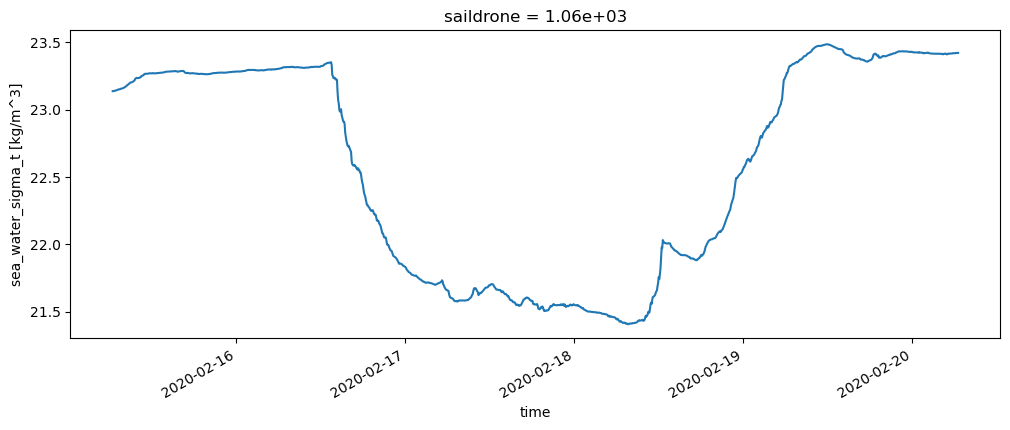

In [22]:
subset.sel(saildrone='1060').sigma0.plot(figsize=(12,4))

In [23]:
# distance function

def CalculateDistance(lon,lat):
    """
    Calculate along-track distance given
        an array of lon,lat.
    Return
        - along-track distance [km]
    """
    return np.hstack([0,np.cumsum(sw.dist(lon=lon,lat=lat,units='km')[0])])

In [24]:
# distance calc for ds with saildrone dimension - wasn't working in loop above 
distance = CalculateDistance(lon = subset.sel(saildrone='1060').longitude, lat = subset.sel(saildrone='1060').latitude)

In [25]:
subset['distance'] = ('time',distance)

Text(0.5, 0, '')

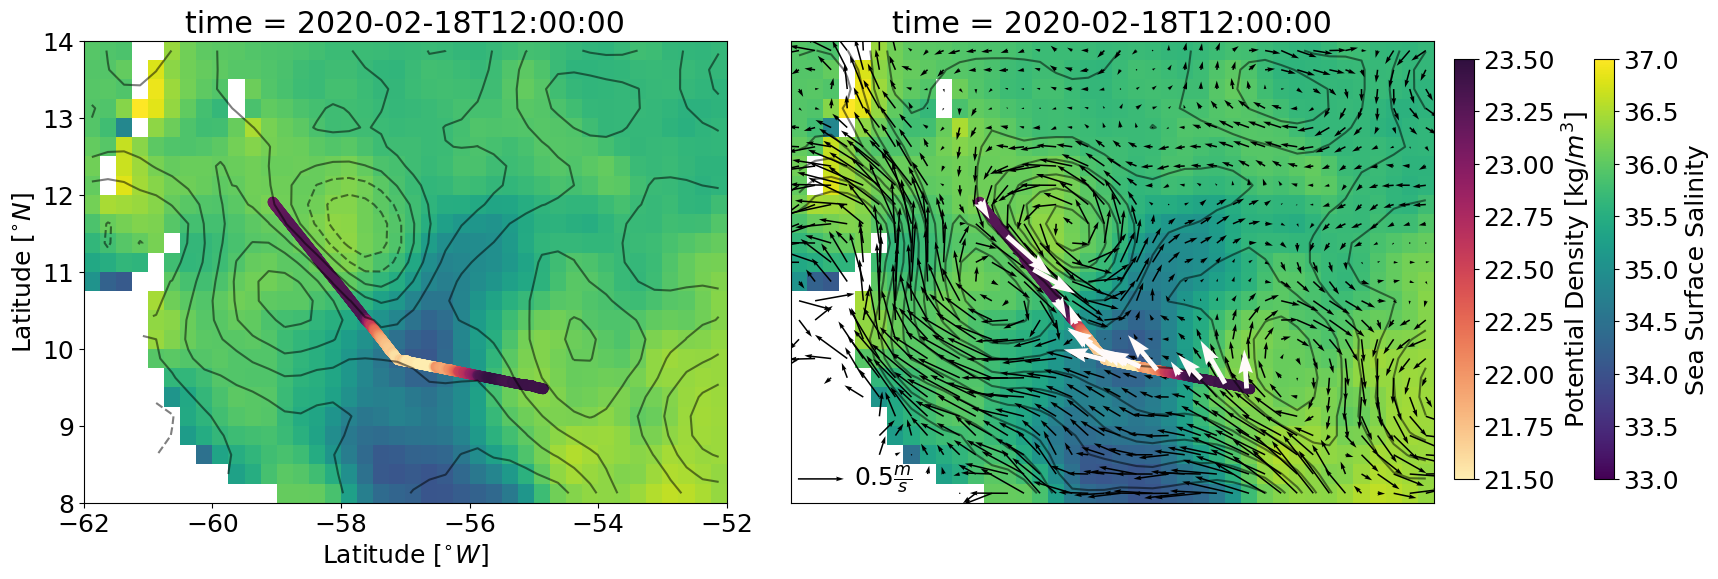

In [26]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,6))
# parameters 
var = "sigma0"
vmin = 21.5
vmax = 23.5
cmap = cmocean.cm.matter

fig.subplots_adjust(right=0.8,wspace=0.1)

# first subplot 
# plot saildrone tracks scattered by salinity
im = ax[0].scatter(subset.sel(saildrone='1061').longitude,subset.sel(saildrone='1060').latitude,
              c=subset.sel(saildrone='1060')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
ax[0].scatter(subset.sel(saildrone='1061').longitude,subset.sel(saildrone='1061').latitude,
              c=subset.sel(saildrone='1061')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
ax[0].scatter(subset.sel(saildrone='1026').longitude,subset.sel(saildrone='1026').latitude,
              c=subset.sel(saildrone='1026')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)

cbar_ax = fig.add_axes([0.81, 0.15, 0.010, 0.7])
fig.colorbar(im, cax=cbar_ax,label=r'Potential Density [kg/$m^3$]')

# plot SMAP SSS data     
im1 = ds_sss.sel(time=('2020-02-18'),longitude=slice(-62,-52),latitude=slice(14,8)).smap_sss.plot(ax=ax[0],zorder=1,vmin=33,vmax=37,add_colorbar=False)

# plt.colorbar(im1,label='Sea Surface Salinity')
cbar_ax = fig.add_axes([0.88, 0.15, 0.010, 0.7])
fig.colorbar(im1, cax=cbar_ax,label='Sea Surface Salinity')
# plot AVISO SSH data 
kw = {'levels':np.arange(-0.15,0.175,.025),'colors':'k'}
ax[0].contour(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
             ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
             ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).sla,**kw,alpha=0.5)

ax[0].set_ylabel(r'Latitude [$^{\circ}N$]')
ax[0].set_xlabel(r'Latitude [$^{\circ}W$]')

# Second subplot
# plot saildrone tracks 
ax[1].scatter(subset.sel(saildrone='1061').longitude,subset.sel(saildrone='1060').latitude,
              c=subset.sel(saildrone='1060')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
    
# plot SSS data 
ds_sss.sel(time=('2020-02-18'),
           longitude=slice(-62,-52),
           latitude=slice(14,8)).smap_sss.plot(ax=ax[1],zorder=1,
                                               vmin=33,vmax=37,
                                               add_colorbar=False,
                                               label=None)

#plot SSH data 
kw = {'levels':np.arange(-0.1+0.5,0.1+0.025+0.5,0.025),'colors':'k'}
ax[1].contour(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
             ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
             ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).adt,**kw,alpha=0.5)

# Quiver plots for SSS data and SD tracks 
im0 = ax[1].quiver(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
             ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
             ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).ugos,
             ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).vgos,scale=7)

im = ax[1].quiver(subset.sel(saildrone='1060').longitude[::100],
             subset.sel(saildrone='1060').latitude[::100],
             subset.sel(saildrone='1060').isel(depth=0).u[::100],
             subset.sel(saildrone='1060').isel(depth=0).v[::100],scale=7,zorder=10,color='snow')

ax[1].quiverkey(im0, 0.505, 0.15, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_xlabel('')
# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/thesis_figs/CaseStudySpatial.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)
            


In [27]:
# calculate shear 
subset['uz'] = -subset.u.differentiate('depth')
subset['vz'] = -subset.v.differentiate('depth')
subset['shear'] = np.sqrt(subset.uz**2 + subset.vz**2)

In [28]:
subset['shear_max_depth'] = subset.shear.idxmax('depth')

/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1619744131.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(subset.sel(saildrone='1060').distance,
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1619744131.py:35: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(label='u velocity \n [m/s]',pad=0.1)
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1619744131.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimens

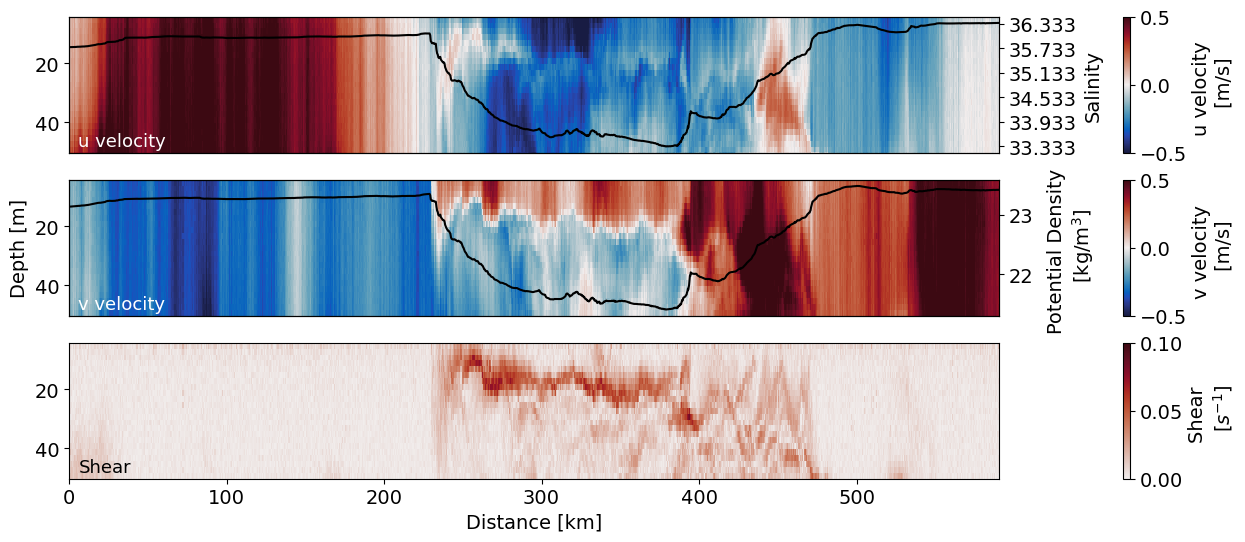

In [29]:
plt.rcParams.update({'font.size': 14})
kw = {'cmap': cmocean.cm.balance,
      'vmin':-0.5,
      'vmax':0.5
      }

labelpos = (0.01,0.05)
ylim = (50.24,4.24)

fig = plt.figure(figsize=(16,6))


ax = fig.add_subplot(311)
im = plt.pcolormesh(subset.sel(saildrone='1060').distance,
               subset.sel(saildrone='1060').depth,
               subset.sel(saildrone='1060').u.T,**kw)
plt.ylim(*ylim)
# plt.ylabel('Depth [m]')
ax.text(*labelpos, 'u velocity', fontsize=13,transform=ax.transAxes,color='white')
plt.xticks([])

plt.twinx()

# plt.plot(nonadcp_cropped.distance,
#          nonadcp_cropped.sel(saildrone='1060').sigma0,color='k')
# plt.ylabel('Potential Density \n [kg/m$^3$]',labelpad=10)

plt.plot(subset.distance,
         subset.sel(saildrone='1060').SAL_SBE37_MEAN,color='k')
plt.ylabel('Salinity',labelpad=5)
plt.yticks(np.arange(subset.sel(saildrone='1060').SAL_SBE37_MEAN.min(),
                     subset.sel(saildrone='1060').SAL_SBE37_MEAN.max(), 0.6),fontsize=14)


plt.colorbar(label='u velocity \n [m/s]',pad=0.1)

ax = fig.add_subplot(312)
plt.pcolormesh(subset.sel(saildrone='1060').distance,
               subset.sel(saildrone='1060').depth,
               subset.sel(saildrone='1060').v.T,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]')
# plt.xlabel('Distance [km]')
plt.xticks([])

ax.text(*labelpos, 'v velocity', fontsize=13,transform=ax.transAxes,color='white')
# ax.tick_params(labelsize=12)

plt.twinx()

plt.plot(subset.distance,
         subset.sel(saildrone='1060').sigma0,color='k')
plt.ylabel('Potential Density \n [kg/m$^3$]',labelpad=10)


plt.colorbar(label='v velocity \n [m/s]',pad=0.1)


kw = {'cmap': cmocean.cm.amp,
      'vmin':0,
      'vmax':0.1
      }
ax = fig.add_subplot(313)
plt.pcolormesh(subset.sel(saildrone='1060').distance,
               subset.sel(saildrone='1060').depth,
               subset.sel(saildrone='1060').shear.T,**kw)
plt.ylim(*ylim)
# plt.ylabel('Depth [m]')
plt.xlabel('Distance [km]')

# plt.twinx()

# plt.plot(subset.rolling(time=24).mean().distance,
#          subset.sel(saildrone='1060').rolling(time=24).mean().shear_max_depth,color='k')
plt.ylim(*ylim)
# plt.ylabel(r'Potential Density [kg/m$^3$]',fontsize=11,labelpad=10)
# plt.colorbar(label='u velocity [m/s]',pad=0.15)

ax.text(*labelpos, 'Shear', fontsize=13,transform=ax.transAxes)
# ax.tick_params(labelsize=12)
plt.colorbar(label='Shear \n [$s^{-1}$]',pad=0.1)

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/CaseStudyPcolor_Sal_rho.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)
            

#### Make plots of SD data over satellite 

Text(0.5, 0, 'Distance [km]')

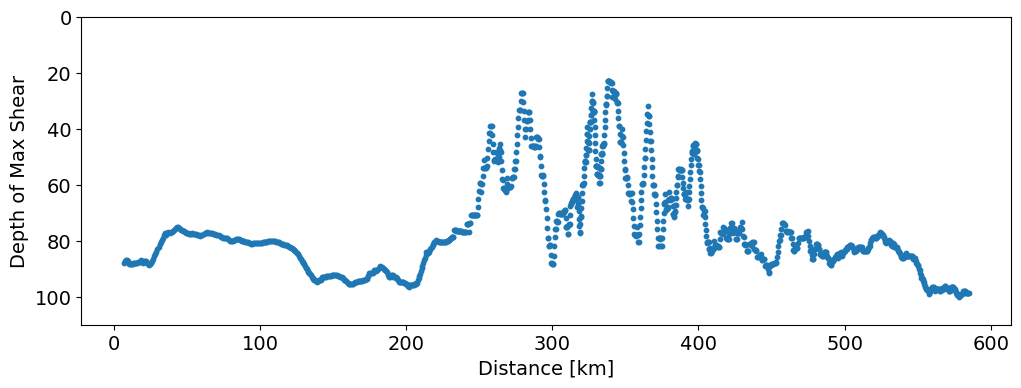

In [30]:
fig = plt.figure(figsize=(12,4))
plt.scatter(subset.sel(saildrone='1060').rolling(time=24).mean().distance,
         subset.sel(saildrone='1060').rolling(time=24).mean().shear_max_depth,s=10)
plt.ylim(110,0)
plt.ylabel('Depth of Max Shear')
plt.xlabel('Distance [km]')

#### More plots - vort, div, strain

In [31]:
subset

<xarray.Dataset>
Dimensions:            (saildrone: 3, time: 1418, depth: 50)
Coordinates:
  * time               (time) datetime64[ns] 2020-02-15T06:30:00 ... 2020-02-...
  * depth              (depth) float64 4.2 6.2 8.2 10.2 ... 98.2 100.2 102.2
  * saildrone          (saildrone) float32 1.026e+03 1.06e+03 1.061e+03
    latitude           (saildrone, time) float64 11.91 11.91 ... 9.484 9.483
    longitude          (saildrone, time) float64 -59.06 -59.06 ... -54.86 -54.86
Data variables: (12/49)
    u                  (saildrone, time, depth) float64 0.101 0.112 ... 0.041
    v                  (saildrone, time, depth) float64 -0.211 -0.209 ... 0.399
    e                  (saildrone, time, depth) float64 -0.003 0.011 ... -0.001
    relative_dist      (saildrone, time) float64 0.9304 0.8427 ... 2.091 1.849
    UWND_MEAN          (saildrone, time) float64 -9.188 -8.27 ... -9.22 -8.73
    UWND_STDDEV        (saildrone, time) float64 0.83 0.82 0.812 ... 0.93 0.814
    ...                 ...
    w                  (depth, time) float64 -0.0 -0.0 ... 8.519e-05 0.0003161
    F                  (depth, time) float64 0.1986 0.1908 ... -0.06976 -0.07619
    uz                 (saildrone, time, depth) float64 -0.0055 ... 0.0875
    vz                 (saildrone, time, depth) float64 -0.001 ... -0.013
    shear              (saildrone, time, depth) float64 0.00559 ... 0.08846
    shear_max_depth    (saildrone, time) float64 94.2 96.2 96.2 ... 102.2 102.2
Attributes: (12/38)
    description:                     Saildrone NetCDF Format
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    keywords:                        ADCP,Saildrone
    geospatial_vertical_units:       meters
    geospatial_lon_units:            degrees_east
    geospatial_lat_units:            degrees_north
    ...                              ...
    geospatial_lat_max:              8.055058442987502
    geospatial_lon_min:              -49.564746832475066
    geospatial_lon_max:              -49.55606075003743
    geospatial_vertical_positive:    down
    wmo_id:                          4803908
    license:                         2020 (C) SAILDRONE Inc.  All Rights Rese...

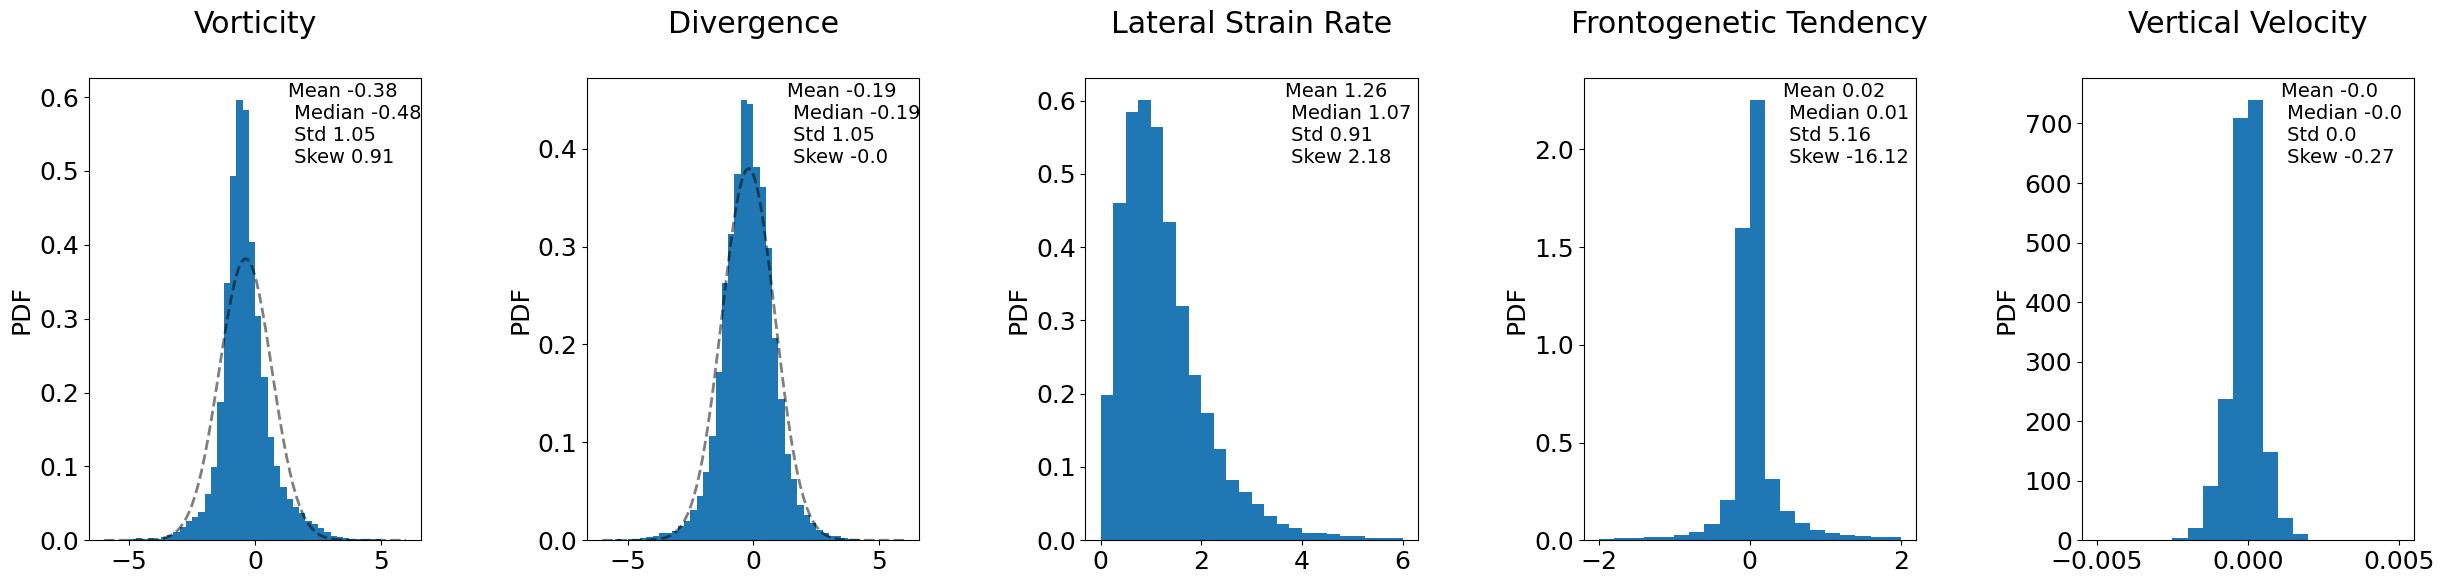

In [32]:
subset = subset.isel(depth=slice(0,24))

plt.rcParams.update({'font.size': 18})

dbins, bmin, bmax = 0.25, -6, 6
fig = plt.figure(figsize=(30,6))
ax0 = fig.add_subplot(151)
ax1 = fig.add_subplot(152)
ax2 = fig.add_subplot(153)
ax3 = fig.add_subplot(154)
ax4 = fig.add_subplot(155)

img0 = ax0.hist(subset.vort.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

# plot normal distribution on top 
x = np.linspace(bmin, bmax, 100)
mu = np.nanmean(subset.vort.values.flatten())
std = np.nanstd(subset.vort.values.flatten())
p = norm.pdf(x, mu, std) 
ax0.plot(x, p, 'k', linewidth=2, linestyle='dashed',alpha=0.5,label='Gaussian')
# ax0.legend()

img1 = ax1.hist(subset.div.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

# plot normal distribution on top 
x = np.linspace(bmin, bmax, 100)
mu = np.nanmean(subset.div.values.flatten())
std = np.nanstd(subset.div.values.flatten())
p = norm.pdf(x, mu, std) 
ax1.plot(x, p, 'k', linewidth=2, linestyle='dashed',alpha=0.5,label='Gaussian')
# ax1.legend()


img2 = ax2.hist(subset.strain.values.flatten(),density=True,bins=np.arange(0,bmax+dbins,dbins))

bmin = -2
bmax = 2
dbins = 0.2

img3 = ax3.hist(subset.F.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

bmin = -0.005
bmax = 0.005
dbins = 0.0005

img4 = ax4.hist(subset.w.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

ax0.set_title('Vorticity',y=1.08)
ax0.set_ylabel('PDF')
ax1.set_title('Divergence',y=1.08)
ax1.set_ylabel('PDF')
ax2.set_title('Lateral Strain Rate',y=1.08)
ax2.set_ylabel('PDF')
ax3.set_title('Frontogenetic Tendency',y=1.08)
ax3.set_ylabel('PDF')
ax4.set_title('Vertical Velocity',y=1.08)
ax4.set_ylabel('PDF')
plt.subplots_adjust(wspace=0.5)
        
for ax,var in zip([ax0, 
                   ax1, 
                   ax2,
                   ax3,
                   ax4],
                  [subset.vort.values.flatten(),
                   subset.div.values.flatten(),
                   subset.strain.values.flatten(),
                   subset.F.values.flatten(),
                   subset.w.values.flatten()]):
        ax.text(.6,0.9,
                (f'Mean {get_stats(var)[0]} \n Median {get_stats(var)[1]} \n Std {get_stats(var)[2]} \n Skew {get_stats(var)[3]}'.format()),
        ha='left',va='center',transform=ax.transAxes,fontsize=14)

# plt.savefig('/home/mlb15109/Research/ATOMIC/figures/gradientcalc_sensitivity/RD5_Int10_k2.jpeg',dpi=200,bbox_inches='tight')
# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/PDFs_front1.jpeg',
#             dpi=200,bbox_inches='tight')

In [84]:
subset

<xarray.Dataset>
Dimensions:            (saildrone: 3, time: 1418, depth: 50)
Coordinates:
  * time               (time) datetime64[ns] 2020-02-15T06:30:00 ... 2020-02-...
  * depth              (depth) float64 4.2 6.2 8.2 10.2 ... 98.2 100.2 102.2
  * saildrone          (saildrone) float32 1.026e+03 1.06e+03 1.061e+03
    latitude           (saildrone, time) float64 ...
    longitude          (saildrone, time) float64 ...
Data variables: (12/45)
    u                  (saildrone, time, depth) float64 0.101 0.112 ... 0.041
    v                  (saildrone, time, depth) float64 -0.211 -0.209 ... 0.399
    e                  (saildrone, time, depth) float64 -0.003 0.011 ... -0.001
    relative_dist      (saildrone, time) float64 0.9304 0.8427 ... 2.091 1.849
    UWND_MEAN          (saildrone, time) float64 -9.188 -8.27 ... -9.22 -8.73
    UWND_STDDEV        (saildrone, time) float64 0.83 0.82 0.812 ... 0.93 0.814
    ...                 ...
    ey                 (depth, time) float64 1.614e-06 1.285e-06 ... 3.208e-07
    vort               (depth, time) float64 -1.37 -1.254 ... -1.781 -1.932
    div                (depth, time) float64 -1.432 -1.247 ... 4.255 5.025
    strain             (depth, time) float64 1.609 1.668 1.784 ... 8.409 7.373
    w                  (depth, time) float64 -0.0 -0.0 ... 8.519e-05 0.0003161
    F                  (depth, time) float64 0.1986 0.1908 ... -0.06976 -0.07619
Attributes: (12/38)
    description:                     Saildrone NetCDF Format
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    keywords:                        ADCP,Saildrone
    geospatial_vertical_units:       meters
    geospatial_lon_units:            degrees_east
    geospatial_lat_units:            degrees_north
    ...                              ...
    geospatial_lat_max:              8.055058442987502
    geospatial_lon_min:              -49.564746832475066
    geospatial_lon_max:              -49.55606075003743
    geospatial_vertical_positive:    down
    wmo_id:                          4803908
    license:                         2020 (C) SAILDRONE Inc.  All Rights Rese...

/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/3760293192.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(subset.distance,
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/3760293192.py:40: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(label='Strain',pad=0.15)
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/3760293192.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.

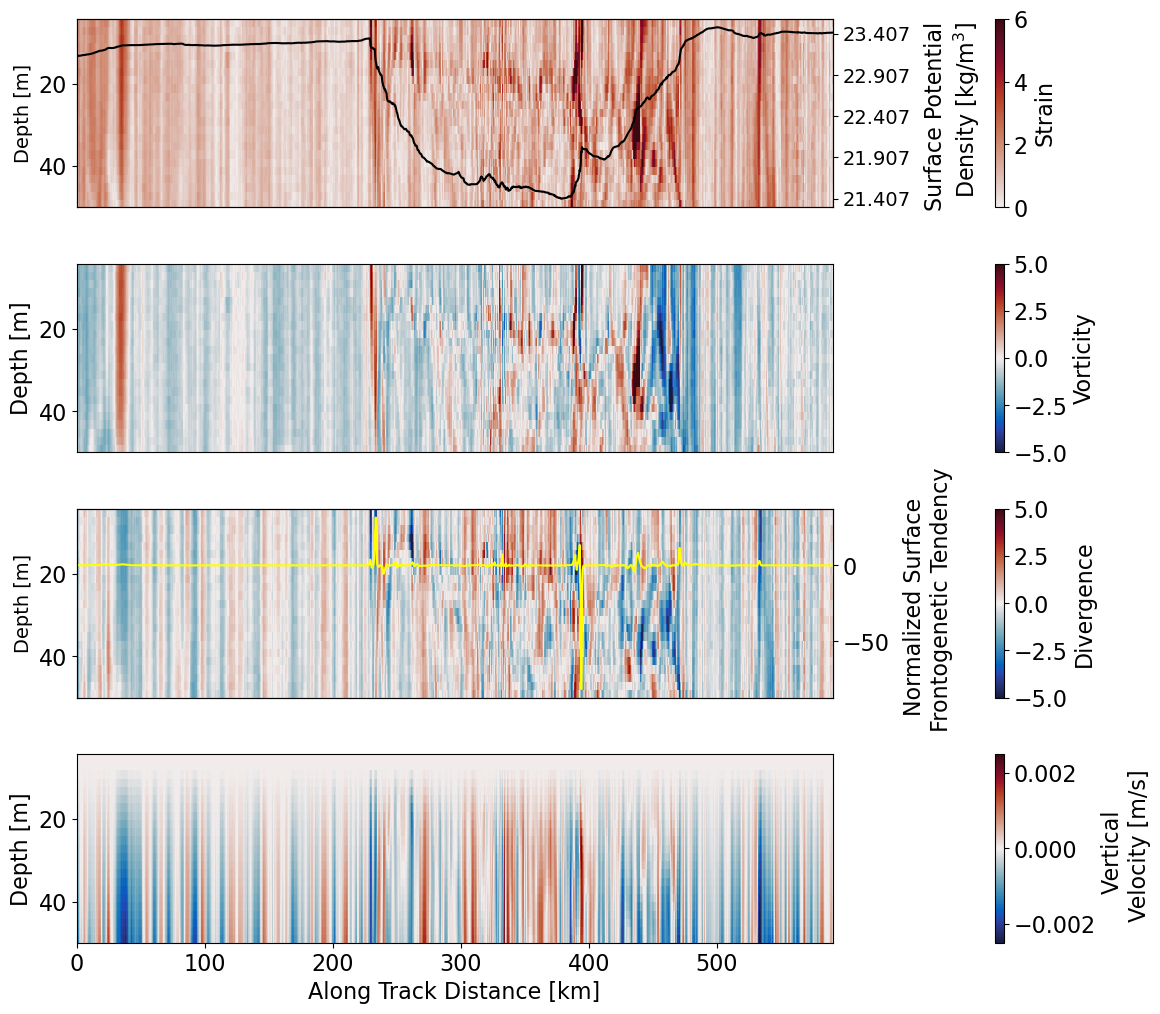

In [33]:
# plot of u and v velocity 

plt.rcParams.update({'font.size': 16})

# coefs1 = coefs.isel(time=slice(290,550))

# nonadcp_cropped_coefs1 = nonadcp_cropped_coefs.isel(time=slice(290,540))

labelpos = (0.01,0.05)
ylim = (50,4.24)

fig = plt.figure(figsize=(16,12))


ax = fig.add_subplot(411)

plt.subplots_adjust(hspace=0.3)

kw = {'cmap': cmocean.cm.amp,
      'vmin':0,
      'vmax':6
      }
im = plt.pcolormesh(subset.distance,
               subset.depth,
               subset.strain,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]',fontsize=14)
# ax.text(*labelpos, 'Strain', fontsize=13,transform=ax.transAxes)
plt.xticks([])
# ax.set_yticks([10,20,30,40,50])

plt.twinx()

plt.plot(subset.distance,
         subset.sel(saildrone='1060').sigma0,color='k')
plt.ylabel('Surface Potential \n Density [kg/m$^3$]',labelpad=10)
plt.yticks(np.arange(subset.sel(saildrone='1060').sigma0.min(),
                     subset.sel(saildrone='1060').sigma0.max(), 0.5),fontsize=14)

plt.colorbar(label='Strain',pad=0.15)


kw = {'cmap': cmocean.cm.balance,
      'vmin':-5,
      'vmax':5
      }
ax = fig.add_subplot(412)
plt.pcolormesh(subset.distance,
               subset.depth,
               subset.vort,**kw)
plt.ylim(*ylim)
plt.xticks([])
plt.ylabel('Depth [m]')
plt.xticks([])

# ax.text(*labelpos, 'Vorticity', fontsize=13,transform=ax.transAxes)
# ax.tick_params(labelsize=12)
plt.colorbar(label='Vorticity',pad=0.15)



ax = fig.add_subplot(413)
im = plt.pcolormesh(subset.distance,
                    subset.depth,
                    subset.div,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]',fontsize=14)
# ax.text(*labelpos, 'Divergence', fontsize=13,transform=ax.transAxes)
# ax.tick_params(labelsize=12)
plt.xticks([])
fig.subplots_adjust(right=0.8)
plt.colorbar(label='Divergence',pad=0.15)

plt.twinx()

plt.plot(subset.distance,
         subset.F.isel(depth=0),color='yellow')
plt.ylabel('Normalized Surface \n Frontogenetic Tendency',labelpad=10)
# plt.yticks(np.arange(coefs.F.isel(depth=0).min(),
#                      coefs.F.isel(depth=0).max(), 5),fontsize=14)
# plt.colorbar(label='Strain',pad=0.15)



# Vertical V
ax = fig.add_subplot(414)

kw = {'cmap': cmocean.cm.balance,
      'vmin':-0.0025,
      'vmax':0.0025
      }

im = plt.pcolormesh(subset.distance,
               subset.depth,
               subset.w,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]')
plt.xlabel('Along Track Distance [km]')
# ax.text(*labelpos, 'Vertical Velocity', fontsize=13,transform=ax.transAxes)
plt.colorbar(label='Vertical \n Velocity [m/s]',pad=0.15)

# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/Strain_div_vort_w_front1.jpeg',
#             dpi=200,bbox_inches='tight')

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/front_casestudy_VortDivStrainW_200to280km.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

In [34]:
coefs_dist = coefs.swap_dims({'time':'distance'})

/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1026512273.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(coefs1.distance,
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1026512273.py:35: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(label='Strain',pad=0.15)
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1026512273.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.

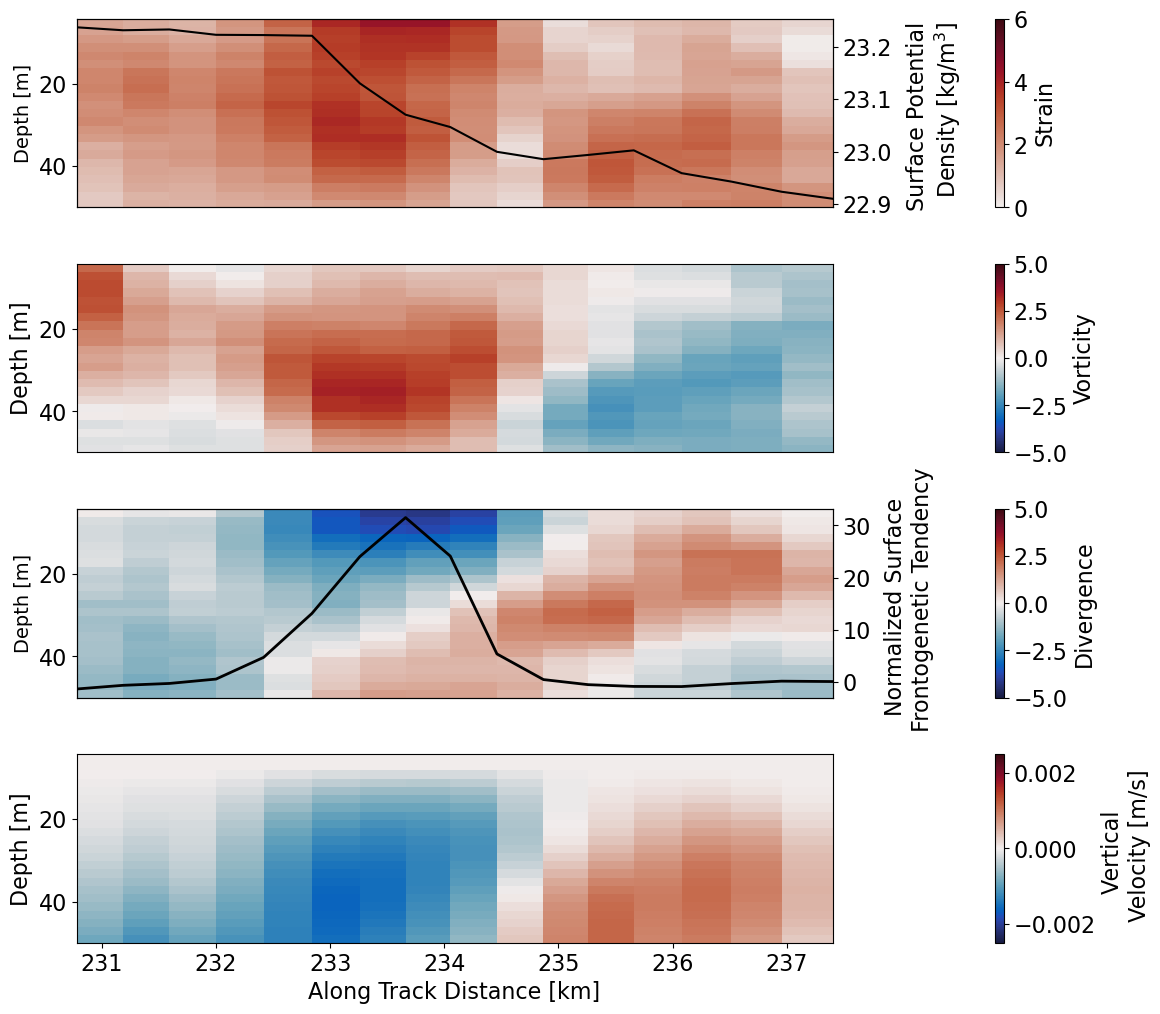

In [35]:
# plot of u and v velocity 

plt.rcParams.update({'font.size': 16})

coefs1 = subset.isel(time=slice(375,392))

labelpos = (0.01,0.05)
ylim = (50,4.24)

fig = plt.figure(figsize=(16,12))


ax = fig.add_subplot(411)

plt.subplots_adjust(hspace=0.3)

kw = {'cmap': cmocean.cm.amp,
      'vmin':0,
      'vmax':6
      }
im = plt.pcolormesh(coefs1.distance,
               coefs1.depth,
               coefs1.strain,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]',fontsize=14)
plt.xticks([])


plt.twinx()

plt.plot(coefs1.distance,
         coefs1.sel(saildrone='1060').sigma0,color='k')
plt.ylabel('Surface Potential \n Density [kg/m$^3$]',labelpad=10)

plt.colorbar(label='Strain',pad=0.15)


kw = {'cmap': cmocean.cm.balance,
      'vmin':-5,
      'vmax':5
      }
ax = fig.add_subplot(412)
plt.pcolormesh(coefs1.distance,
               coefs1.depth,
               coefs1.vort,**kw)
plt.ylim(*ylim)
plt.xticks([])
plt.ylabel('Depth [m]')
plt.xticks([])

plt.colorbar(label='Vorticity',pad=0.15)



ax = fig.add_subplot(413)
im = plt.pcolormesh(coefs1.distance,
                    coefs1.depth,
                    coefs1.div,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]',fontsize=14)
plt.xticks([])
fig.subplots_adjust(right=0.8)
plt.colorbar(label='Divergence',pad=0.15)

plt.twinx()

plt.plot(coefs1.distance,
         coefs1.F.isel(depth=0),color='k',linewidth=2)
plt.ylabel('Normalized Surface \n Frontogenetic Tendency',labelpad=10)

# Vertical V
ax = fig.add_subplot(414)

kw = {'cmap': cmocean.cm.balance,
      'vmin':-0.0025,
      'vmax':0.0025
      }

im = plt.pcolormesh(coefs1.distance,
               coefs1.depth,
               coefs1.w,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]')
plt.xlabel('Along Track Distance [km]')
# ax.text(*labelpos, 'Vertical Velocity', fontsize=13,transform=ax.transAxes)
plt.colorbar(label='Vertical \n Velocity [m/s]',pad=0.15)

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/front_casestudy_VortDivStrainW_paper.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

Text(0.5, 0, 'Along Track Distance')

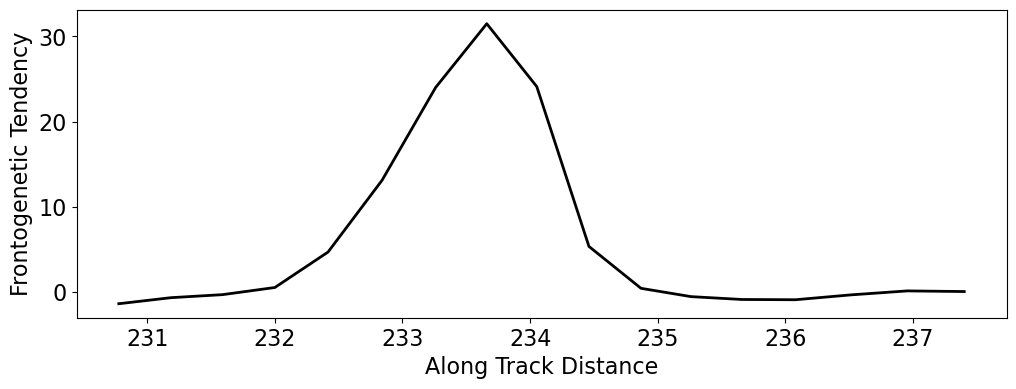

In [36]:
fig = plt.figure(figsize=(12,4))
plt.plot(coefs1.distance,
         coefs1.F.isel(depth=0),color='k',linewidth=2)
plt.ylabel('Frontogenetic Tendency')
plt.xlabel('Along Track Distance')

In [37]:
coefs1 = subset.isel(time=slice(350,490))

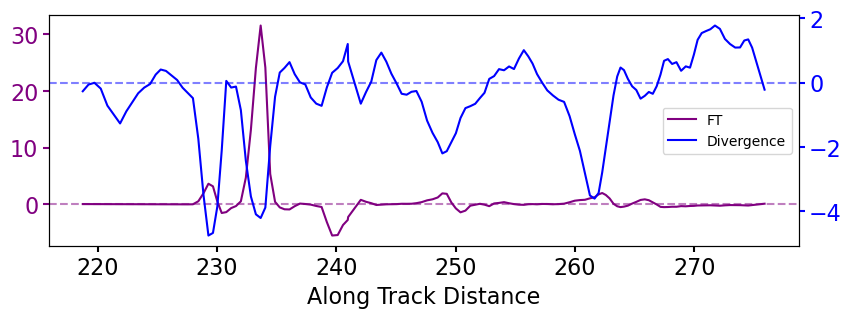

In [38]:
fig, ax = plt.subplots(figsize=(12,3))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()

p1, = ax.plot(coefs1.distance,coefs1.isel(depth=0).F, "purple", label="FT")
p2, = twin1.plot(coefs1.distance,coefs1.isel(depth=0).div, "b-", label="Divergence")

ax.set_xlabel('Along Track Distance')
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.axhline(y=0,color='purple',linestyle='dashed',alpha=0.5)
twin1.axhline(y=0,color='b',linestyle='dashed',alpha=0.5)

ax.legend(handles=[p1, p2],loc='center right',fontsize=10)

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/DivFT_paper.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

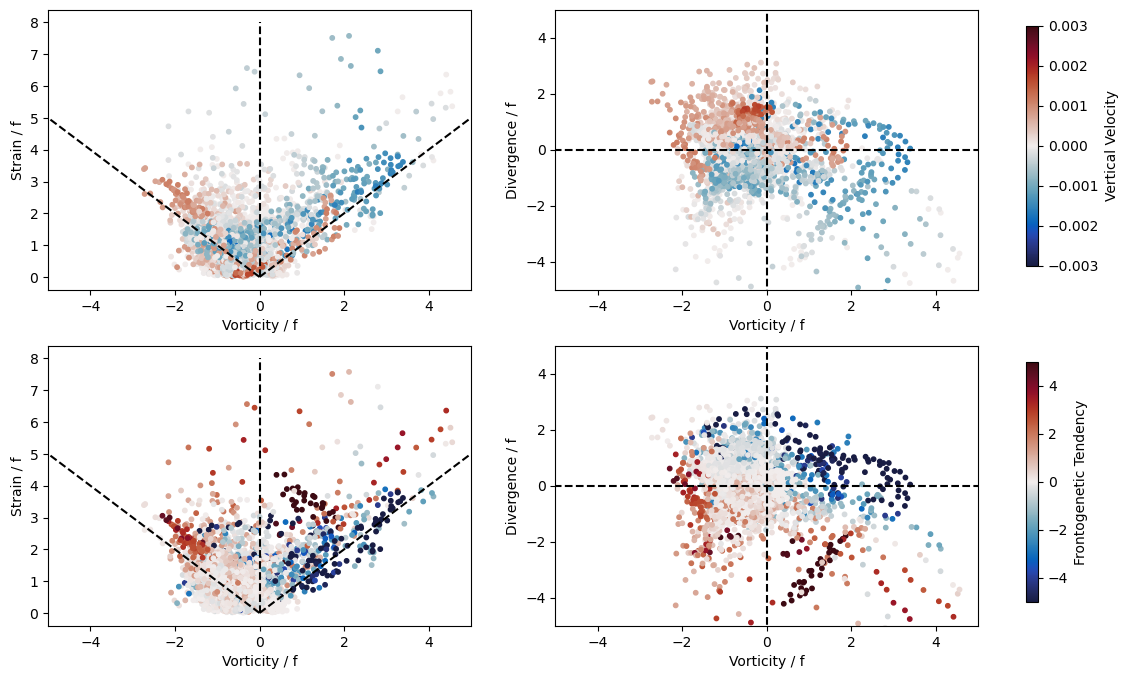

In [39]:
# subplots of:
# 1. strain vs. vorticity colored with vertical velocity 
# 2. divergence vs. vorticity colored with vertical velocity 
# 3. strain vs. vorticity colored with frontogenetic tendency 
# 4. divergence vs. vorticity colored with frontogenetic tendency 

plt.rcParams.update({'font.size': 10})
xmin = -5 
xmax = 5
subset = coefs1.isel(depth=slice(0,24))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

#parameters
kw = {'cmap':cmocean.cm.balance,
      'vmin':-0.003,
      'vmax':0.003}

# first subplot 
ax[0,0].scatter(subset.vort,subset.strain,c=subset.w,s=10,**kw)
ax[0,0].set_xlabel('Vorticity / f')
ax[0,0].set_ylabel('Strain / f')
ax[0,0].set_xlim(xmin,xmax)

# plot 1:1 lines 
x = subset.vort
y = subset.strain
ax[0,0].plot([0, xmax], [0, xmax], 'k',linestyle='dashed')
ax[0,0].plot([0, xmin], [0, -xmin], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[0,0].vlines(x=0,ymax=8,ymin=0,color='k',linestyle='dashed')

#second subplot
im = ax[0,1].scatter(subset.vort,subset.div,c=subset.w,s=10,**kw)
ax[0,1].set_xlabel('Vorticity / f')
ax[0,1].set_ylabel('Divergence / f')
ax[0,1].set_ylim(-5,5)
ax[0,1].set_xlim(-5,5)
cbar_ax = fig.add_axes([0.94, 0.56, 0.010, 0.3])
fig.colorbar(im, cax=cbar_ax,label=r'Vertical Velocity')
ax[0,1].plot([-10,10],[0,0],'--',color='k')
ax[0,1].plot([0,0],[-10,10],'--',color='k')

kw = {'cmap':cmocean.cm.balance,
      'vmin':-5,
      'vmax':5}
# third subplot
ax[1,0].scatter(subset.vort,subset.strain,c=subset.F,s=10,**kw)
ax[1,0].set_xlabel('Vorticity / f')
ax[1,0].set_ylabel('Strain / f')
ax[1,0].set_xlim(-5,5)

# plot 1:1 lines 
x = subset.vort
y = subset.strain
ax[1,0].plot([0, xmax], [0, xmax], 'k',linestyle='dashed')
ax[1,0].plot([0, xmin], [0, -xmin], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[1,0].vlines(x=0,ymax=8,ymin=0,color='k',linestyle='dashed')

# fourth subplot
im = ax[1,1].scatter(subset.vort,subset.div,c=subset.F,s=10,**kw)
ax[1,1].set_xlabel('Vorticity / f')
ax[1,1].set_ylabel('Divergence / f')
ax[1,1].set_ylim(-5,5)
ax[1,1].set_xlim(-5,5)
cbar_ax = fig.add_axes([0.94, 0.14, 0.010, 0.3])
fig.colorbar(im, cax=cbar_ax,label=r'Frontogenetic Tendency')
ax[1,1].plot([-10,10],[0,0],'--',color='k')
ax[1,1].plot([0,0],[-10,10],'--',color='k')

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/ScatterPlots_510to540km.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

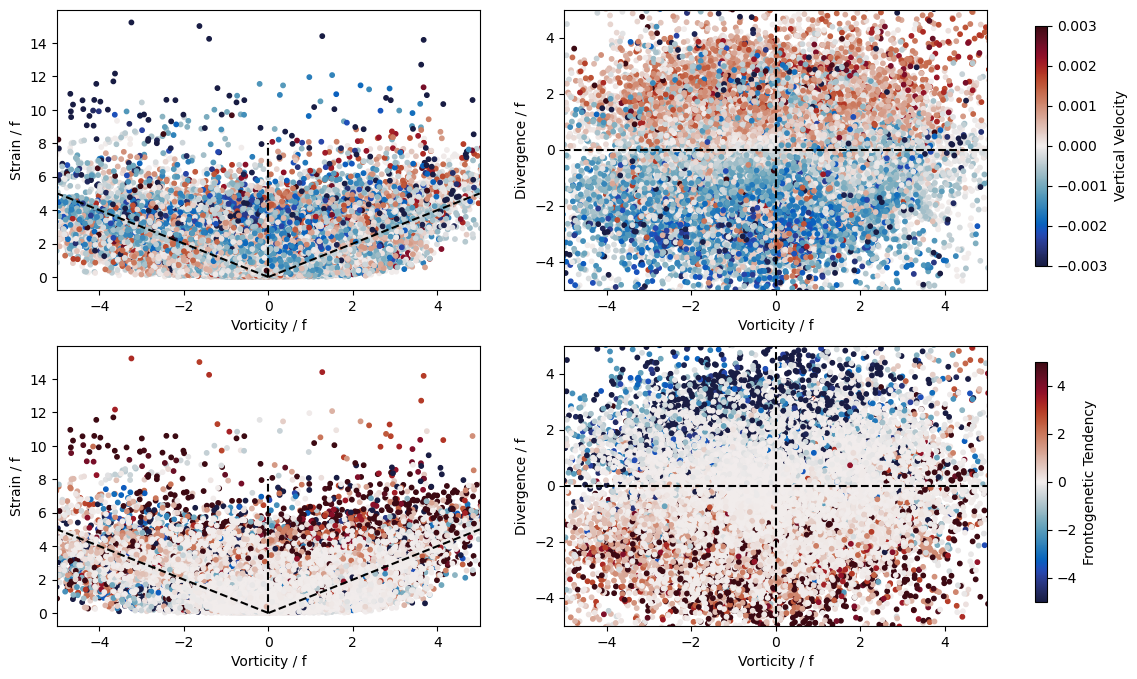

In [40]:
# subplots of:
# 1. strain vs. vorticity colored with vertical velocity 
# 2. divergence vs. vorticity colored with vertical velocity 
# 3. strain vs. vorticity colored with frontogenetic tendency 
# 4. divergence vs. vorticity colored with frontogenetic tendency 

plt.rcParams.update({'font.size': 10})
xmin = -5 
xmax = 5
subset = coefs.isel(depth=slice(0,24))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

#parameters
kw = {'cmap':cmocean.cm.balance,
      'vmin':-0.003,
      'vmax':0.003}

# first subplot 
ax[0,0].scatter(subset.vort,subset.strain,c=subset.w,s=10,**kw)
ax[0,0].set_xlabel('Vorticity / f')
ax[0,0].set_ylabel('Strain / f')
ax[0,0].set_xlim(xmin,xmax)

# plot 1:1 lines 
x = subset.vort
y = subset.strain
ax[0,0].plot([0, xmax], [0, xmax], 'k',linestyle='dashed')
ax[0,0].plot([0, xmin], [0, -xmin], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[0,0].vlines(x=0,ymax=8,ymin=0,color='k',linestyle='dashed')

#second subplot
im = ax[0,1].scatter(subset.vort,subset.div,c=subset.w,s=10,**kw)
ax[0,1].set_xlabel('Vorticity / f')
ax[0,1].set_ylabel('Divergence / f')
ax[0,1].set_ylim(-5,5)
ax[0,1].set_xlim(-5,5)
cbar_ax = fig.add_axes([0.94, 0.56, 0.010, 0.3])
fig.colorbar(im, cax=cbar_ax,label=r'Vertical Velocity')
ax[0,1].plot([-10,10],[0,0],'--',color='k')
ax[0,1].plot([0,0],[-10,10],'--',color='k')

kw = {'cmap':cmocean.cm.balance,
      'vmin':-5,
      'vmax':5}
# third subplot
ax[1,0].scatter(subset.vort,subset.strain,c=subset.F,s=10,**kw)
ax[1,0].set_xlabel('Vorticity / f')
ax[1,0].set_ylabel('Strain / f')
ax[1,0].set_xlim(-5,5)

# plot 1:1 lines 
x = subset.vort
y = subset.strain
ax[1,0].plot([0, xmax], [0, xmax], 'k',linestyle='dashed')
ax[1,0].plot([0, xmin], [0, -xmin], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[1,0].vlines(x=0,ymax=8,ymin=0,color='k',linestyle='dashed')

# fourth subplot
im = ax[1,1].scatter(subset.vort,subset.div,c=subset.F,s=10,**kw)
ax[1,1].set_xlabel('Vorticity / f')
ax[1,1].set_ylabel('Divergence / f')
ax[1,1].set_ylim(-5,5)
ax[1,1].set_xlim(-5,5)
cbar_ax = fig.add_axes([0.94, 0.14, 0.010, 0.3])
fig.colorbar(im, cax=cbar_ax,label=r'Frontogenetic Tendency')
ax[1,1].plot([-10,10],[0,0],'--',color='k')
ax[1,1].plot([0,0],[-10,10],'--',color='k')

# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/scatterplots_front1.jpeg',
#             dpi=200,bbox_inches='tight')

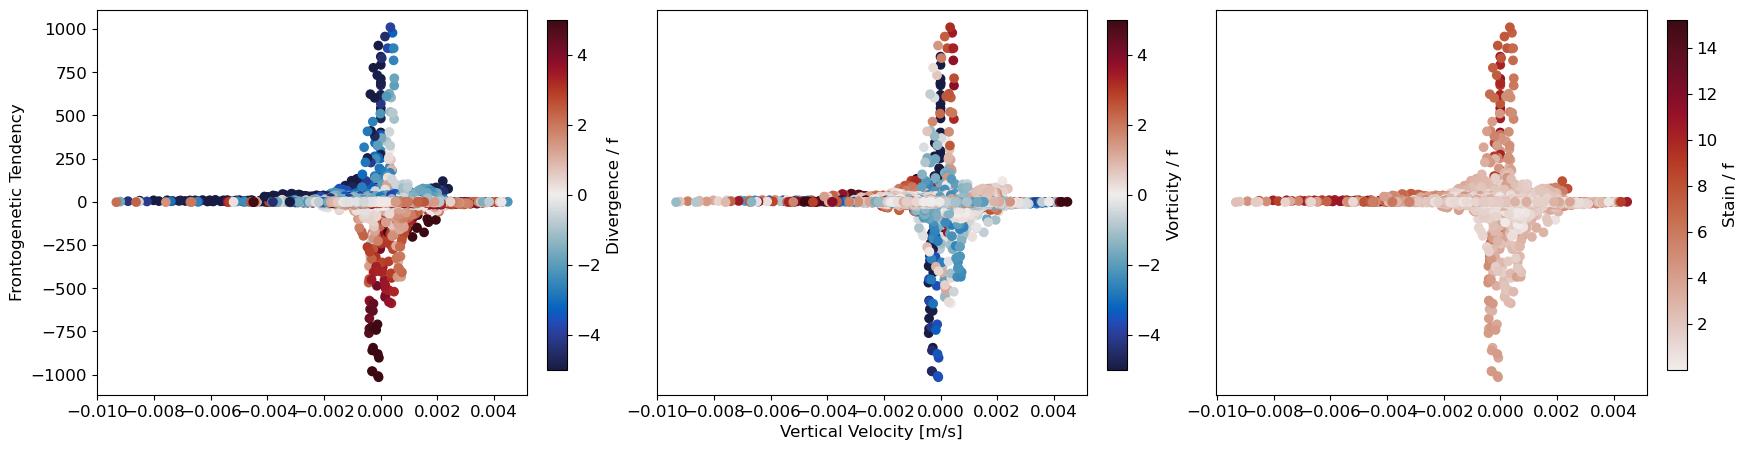

In [41]:
# subplots of :
# 1. vertical velocity vs. frontogenetic tendency colored by divergence
# 2. vertical vel vs. tendency colored by vort 
# 3. vertical vel vs. tendency colored by strain 

plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.subplots_adjust(wspace=0.3)

kw = {'cmap':cmocean.cm.balance,
      'vmin':-5,
      'vmax':5}
im = ax[0].scatter(subset.w,subset.F,c=subset.div,**kw)
ax[0].set_ylabel('Frontogenetic Tendency')
cbar_ax = fig.add_axes([0.35, 0.16, 0.010, 0.7])
fig.colorbar(im, cax=cbar_ax,label=r'Divergence / f')


im = ax[1].scatter(subset.w,subset.F,c=subset.vort,**kw)
ax[1].set_xlabel('Vertical Velocity [m/s]')
ax[1].set_yticks([])
cbar_ax = fig.add_axes([0.63, 0.16, 0.010, 0.7])
fig.colorbar(im, cax=cbar_ax,label=r'Vorticity / f')


im = ax[2].scatter(subset.w,subset.F,c=subset.strain,cmap=cmocean.cm.amp)
ax[2].set_yticks([])
cbar_ax = fig.add_axes([0.91, 0.16, 0.010, 0.7])
fig.colorbar(im, cax=cbar_ax,label=r'Stain / f')

# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/tendency_w_front1.jpeg',
#             dpi=200,bbox_inches='tight')


Text(0, 0.5, 'Normalized FT')

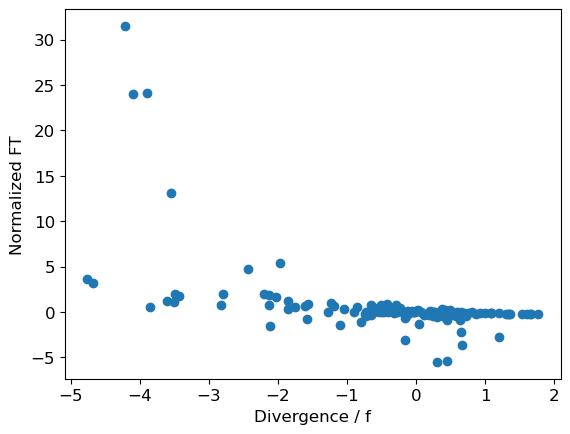

In [42]:
plt.scatter(coefs1.isel(depth=0).div,
            coefs1.isel(depth=0).F)

plt.xlabel('Divergence / f')
plt.ylabel('Normalized FT')

Text(0, 0.5, 'Normalized FT')

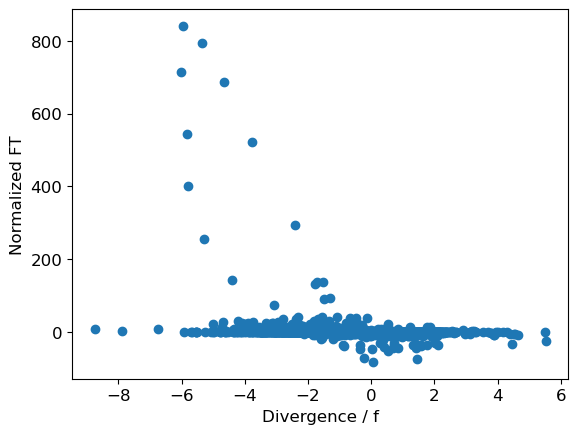

In [43]:
plt.scatter(subset.isel(depth=0).div,
            subset.isel(depth=0).F)

plt.xlabel('Divergence / f')
plt.ylabel('Normalized FT')

### Plume vs non plume 

In [85]:
subset

<xarray.Dataset>
Dimensions:            (saildrone: 3, time: 1418, depth: 50)
Coordinates:
  * time               (time) datetime64[ns] 2020-02-15T06:30:00 ... 2020-02-...
  * depth              (depth) float64 4.2 6.2 8.2 10.2 ... 98.2 100.2 102.2
  * saildrone          (saildrone) float32 1.026e+03 1.06e+03 1.061e+03
    latitude           (saildrone, time) float64 ...
    longitude          (saildrone, time) float64 ...
Data variables: (12/45)
    u                  (saildrone, time, depth) float64 0.101 0.112 ... 0.041
    v                  (saildrone, time, depth) float64 -0.211 -0.209 ... 0.399
    e                  (saildrone, time, depth) float64 -0.003 0.011 ... -0.001
    relative_dist      (saildrone, time) float64 0.9304 0.8427 ... 2.091 1.849
    UWND_MEAN          (saildrone, time) float64 -9.188 -8.27 ... -9.22 -8.73
    UWND_STDDEV        (saildrone, time) float64 0.83 0.82 0.812 ... 0.93 0.814
    ...                 ...
    ey                 (depth, time) float64 1.614e-06 1.285e-06 ... 3.208e-07
    vort               (depth, time) float64 -1.37 -1.254 ... -1.781 -1.932
    div                (depth, time) float64 -1.432 -1.247 ... 4.255 5.025
    strain             (depth, time) float64 1.609 1.668 1.784 ... 8.409 7.373
    w                  (depth, time) float64 -0.0 -0.0 ... 8.519e-05 0.0003161
    F                  (depth, time) float64 0.1986 0.1908 ... -0.06976 -0.07619
Attributes: (12/38)
    description:                     Saildrone NetCDF Format
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    keywords:                        ADCP,Saildrone
    geospatial_vertical_units:       meters
    geospatial_lon_units:            degrees_east
    geospatial_lat_units:            degrees_north
    ...                              ...
    geospatial_lat_max:              8.055058442987502
    geospatial_lon_min:              -49.564746832475066
    geospatial_lon_max:              -49.55606075003743
    geospatial_vertical_positive:    down
    wmo_id:                          4803908
    license:                         2020 (C) SAILDRONE Inc.  All Rights Rese...

In [90]:
plume_time = subset.SAL_SBE37_MEAN.where(subset.SAL_SBE37_MEAN < 35.1,drop=True).time

In [100]:
nonplume_time = subset.SAL_SBE37_MEAN.where(subset.SAL_SBE37_MEAN > 35.7,drop=True).time

In [101]:
plume = subset.sel(time=plume_time)

In [102]:
nonplume = subset.sel(time=nonplume_time)

In [103]:
# plume = subset.where(subset.SAL_SBE37_MEAN < 35.1, drop=True)

In [104]:
# nonplume = subset.where(subset.SAL_SBE37_MEAN > 36, drop=True)

Text(0.5, 0, '')

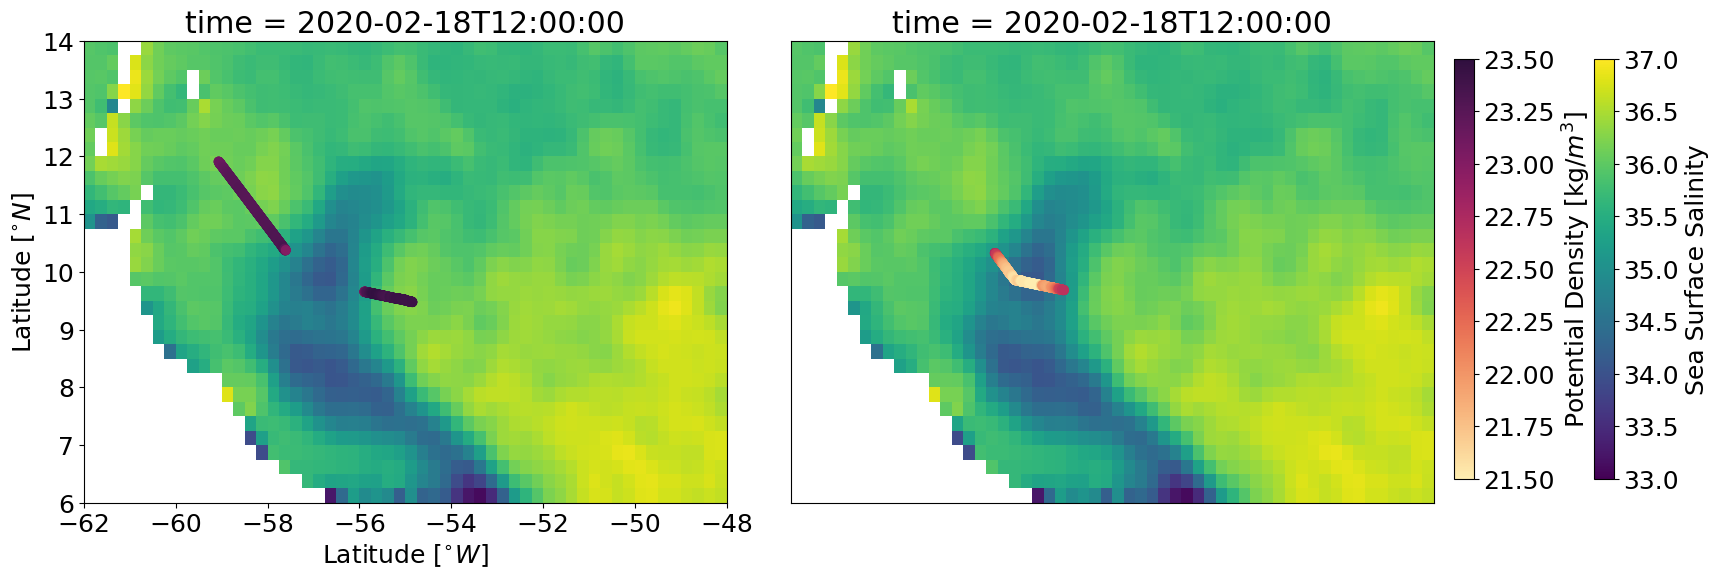

In [105]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,6))
# parameters 
var = "sigma0"
vmin = 21.5
vmax = 23.5
cmap = cmocean.cm.matter

fig.subplots_adjust(right=0.8,wspace=0.1)

# first subplot 
# plot saildrone tracks scattered by salinity
im = ax[0].scatter(nonplume.sel(saildrone='1060').longitude,nonplume.sel(saildrone='1060').latitude,
              c=nonplume.sel(saildrone='1060')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
ax[0].scatter(nonplume.sel(saildrone='1061').longitude,nonplume.sel(saildrone='1061').latitude,
              c=nonplume.sel(saildrone='1061')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
ax[0].scatter(nonplume.sel(saildrone='1026').longitude,nonplume.sel(saildrone='1026').latitude,
              c=nonplume.sel(saildrone='1026')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)

# plt.colorbar(im,label=r'Potential Density [kg/$m^3$]')
cbar_ax = fig.add_axes([0.81, 0.15, 0.010, 0.7])
fig.colorbar(im, cax=cbar_ax,label=r'Potential Density [kg/$m^3$]')
# ax[0].scatter(subset_nonadcp.sel(saildrone='1060').longitude[::100],subset_nonadcp.sel(saildrone='1060').latitude[::100],
              # c=subset_nonadcp.sel(saildrone='1060')[var][::100],zorder=2,vmin=33.5,vmax=37.5,edgecolor='red',alpha=0.7)

# plot SMAP SSS data     
im1 = ds_sss.sel(time=('2020-02-18'),longitude=slice(-62,-48),latitude=slice(14,6)).smap_sss.plot(ax=ax[0],zorder=1,vmin=33,vmax=37,add_colorbar=False)

# plt.colorbar(im1,label='Sea Surface Salinity')
cbar_ax = fig.add_axes([0.88, 0.15, 0.010, 0.7])
fig.colorbar(im1, cax=cbar_ax,label='Sea Surface Salinity')
# plot AVISO SSH data 
# kw = {'levels':np.arange(-0.15,0.175,.025),'colors':'k'}
# ax[0].contour(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).sla,**kw,alpha=0.5)

ax[0].set_ylabel(r'Latitude [$^{\circ}N$]')
ax[0].set_xlabel(r'Latitude [$^{\circ}W$]')

# Second subplot
# plot saildrone tracks 
ax[1].scatter(plume.sel(saildrone='1060').longitude,plume.sel(saildrone='1060').latitude,
              c=plume.sel(saildrone='1060')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)

ax[1].scatter(plume.sel(saildrone='1061').longitude,plume.sel(saildrone='1061').latitude,
              c=plume.sel(saildrone='1061')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)

ax[1].scatter(plume.sel(saildrone='1026').longitude,plume.sel(saildrone='1026').latitude,
              c=plume.sel(saildrone='1026')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
    
# plot SSS data 
ds_sss.sel(time=('2020-02-18'),
           longitude=slice(-62,-48),
           latitude=slice(14,6)).smap_sss.plot(ax=ax[1],zorder=1,
                                               vmin=33,vmax=37,
                                               add_colorbar=False,
                                               label=None)

#plot SSH data 
# kw = {'levels':np.arange(-0.1+0.5,0.1+0.025+0.5,0.025),'colors':'k'}
# ax[1].contour(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).adt,**kw,alpha=0.5)

# # Quiver plots for SSS data and SD tracks 
# im0 = ax[1].quiver(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).ugos,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).vgos,scale=7)

# im = ax[1].quiver(subset_adcp.sel(saildrone='1060').longitude[::100],
#              subset_adcp.sel(saildrone='1060').latitude[::100],
#              subset_adcp.sel(saildrone='1060').isel(depth=0).u[::100],
#              subset_adcp.sel(saildrone='1060').isel(depth=0).v[::100],scale=7,zorder=10,color='snow')

# ax[1].quiverkey(im0, 0.505, 0.15, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_xlabel('')

# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/Satellite_SDtracks_afterplume.jpeg',
#             dpi=200,bbox_inches='tight')

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/thesis_figs/CaseStudySpatial.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)
            


/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1850722935.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax[0].hist2d(plume.vort.values.flatten(),plume.div.values.flatten(),bins=[binsx,binsy],density=True,cmap=cmocean.cm.dense,
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1850722935.py:22: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax[1].hist2d(plume.vort.values.flatten(),plume.strain.values.flatten(),bins=[binsx,bins_s],density=True,cmap=cmocean.cm.dense,


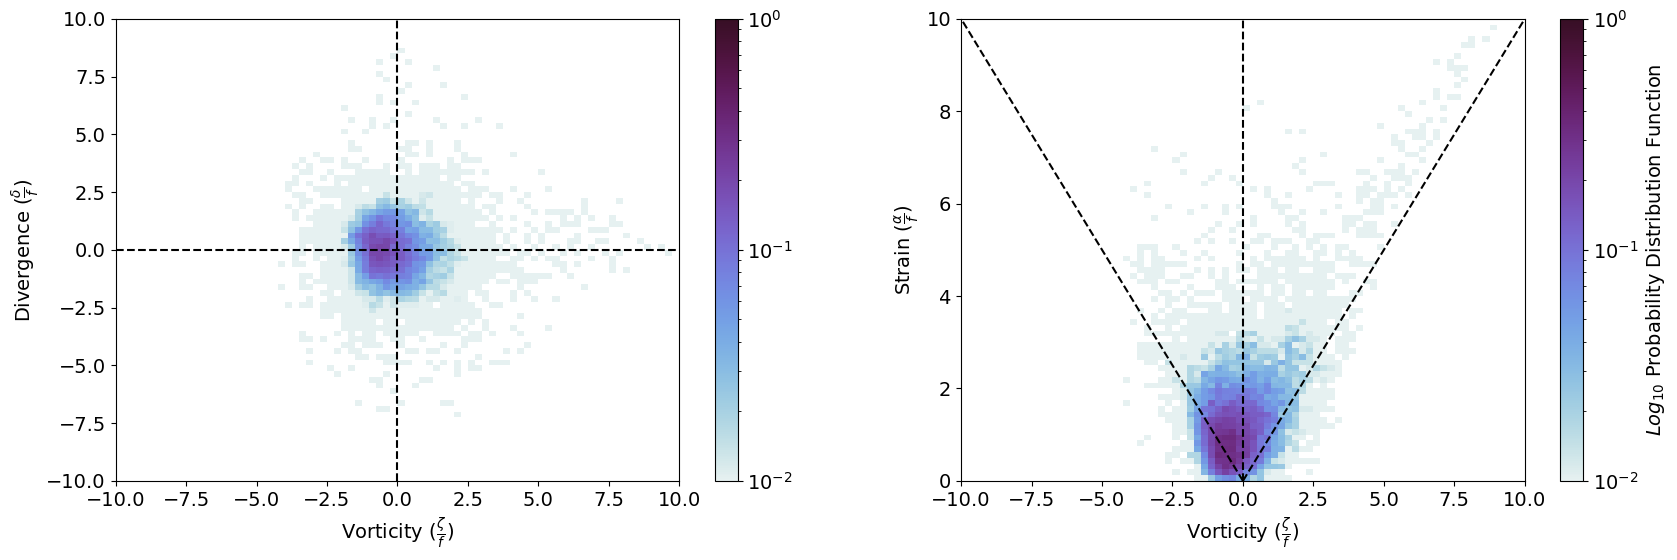

In [106]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
# my_cmap = cmap = plt.cm.get_cmap("Spectral_r").copy()
# my_cmap.set_under('w',0.001)
dbins, bmin, bmax = 0.25, -10, 10
plume = plume.isel(depth=slice(0,24))
binsx=np.arange(bmin,bmax+dbins,dbins)
binsy=np.arange(bmin,bmax+dbins,dbins)
bins_s=np.arange(0,bmax+dbins/2,dbins/2)
ax[0].hist2d(plume.vort.values.flatten(),plume.div.values.flatten(),bins=[binsx,binsy],density=True,cmap=cmocean.cm.dense,
          norm=mpl.colors.LogNorm(),vmin=10e-3,vmax=10e-1)
# ax.set_facecolor("white")
# cbar_ax = fig.add_axes([0.94, 0.14, 0.010, 0.3])
# plt.colorbar(im[3],ax=ax[0])
# ax.set_facecolor("white")
ax[0].plot([bmin,bmax],[0,0],'--',color='k')
ax[0].plot([0,0],[bmin,bmax],'--',color='k')
ax[0].set_xlabel(r'Vorticity $(\frac{\zeta}{f})$')
ax[0].set_ylabel(r'Divergence $(\frac{\delta}{f})$')


im = ax[1].hist2d(plume.vort.values.flatten(),plume.strain.values.flatten(),bins=[binsx,bins_s],density=True,cmap=cmocean.cm.dense,
          norm=mpl.colors.LogNorm(),vmin=10e-3,vmax=10e-1)

# plot 1:1 lines 
x = plume.vort
y = plume.strain
ax[1].plot([0, bmax], [0, bmax], 'k',linestyle='dashed')
ax[1].plot([0, bmin], [0, -bmin], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[1].vlines(x=0,ymax=y.max(),ymin=0,color='k',linestyle='dashed')

ax[1].set_xlabel(r'Vorticity $(\frac{\zeta}{f})$')
ax[1].set_ylabel(r'Strain $(\frac{\alpha}{f})$')
plt.colorbar(im[3],label=r'$Log_{10}$ Probability Distribution Function',ax=ax[1])
plt.colorbar(im[3],ax=ax[0])

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/JPDF.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1531973232.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax[0].hist2d(nonplume.vort.values.flatten(),nonplume.div.values.flatten(),bins=[binsx,binsy],density=True,cmap=cmocean.cm.dense,
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1531973232.py:22: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax[1].hist2d(nonplume.vort.values.flatten(),nonplume.strain.values.flatten(),bins=[binsx,bins_s],density=True,cmap=cmocean.cm.dense,


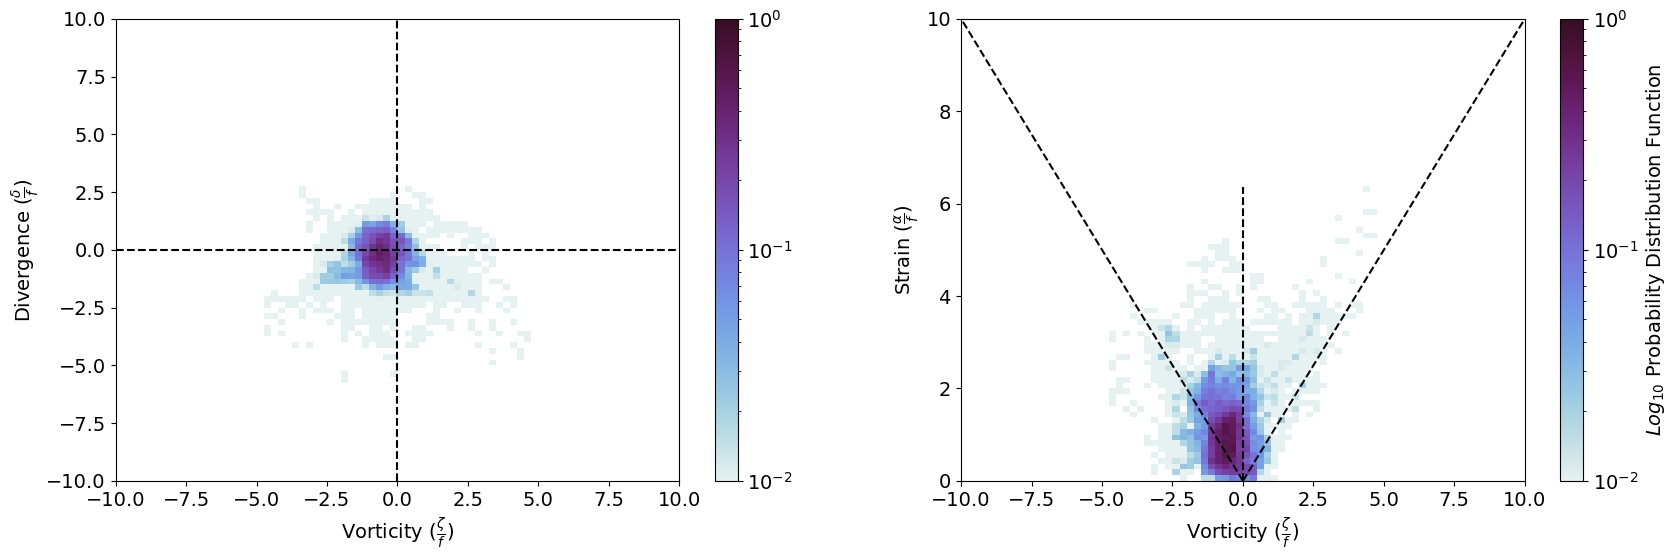

In [107]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
# my_cmap = cmap = plt.cm.get_cmap("Spectral_r").copy()
# my_cmap.set_under('w',0.001)
dbins, bmin, bmax = 0.25, -10, 10
nonplume = nonplume.isel(depth=slice(0,24))
binsx=np.arange(bmin,bmax+dbins,dbins)
binsy=np.arange(bmin,bmax+dbins,dbins)
bins_s=np.arange(0,bmax+dbins/2,dbins/2)
ax[0].hist2d(nonplume.vort.values.flatten(),nonplume.div.values.flatten(),bins=[binsx,binsy],density=True,cmap=cmocean.cm.dense,
          norm=mpl.colors.LogNorm(),vmin=10e-3,vmax=10e-1)
# ax.set_facecolor("white")
# cbar_ax = fig.add_axes([0.94, 0.14, 0.010, 0.3])
# plt.colorbar(im[3],ax=ax[0])
# ax.set_facecolor("white")
ax[0].plot([bmin,bmax],[0,0],'--',color='k')
ax[0].plot([0,0],[bmin,bmax],'--',color='k')
ax[0].set_xlabel(r'Vorticity $(\frac{\zeta}{f})$')
ax[0].set_ylabel(r'Divergence $(\frac{\delta}{f})$')


im = ax[1].hist2d(nonplume.vort.values.flatten(),nonplume.strain.values.flatten(),bins=[binsx,bins_s],density=True,cmap=cmocean.cm.dense,
          norm=mpl.colors.LogNorm(),vmin=10e-3,vmax=10e-1)

# plot 1:1 lines 
x = nonplume.vort
y = nonplume.strain
ax[1].plot([0, bmax], [0, bmax], 'k',linestyle='dashed')
ax[1].plot([0, bmin], [0, -bmin], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[1].vlines(x=0,ymax=y.max(),ymin=0,color='k',linestyle='dashed')

ax[1].set_xlabel(r'Vorticity $(\frac{\zeta}{f})$')
ax[1].set_ylabel(r'Strain $(\frac{\alpha}{f})$')
plt.colorbar(im[3],label=r'$Log_{10}$ Probability Distribution Function',ax=ax[1])
plt.colorbar(im[3],ax=ax[0])

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/JPDF.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1292366820.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(plume.distance,
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1292366820.py:35: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(label='Strain',pad=0.15)
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1292366820.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3. 

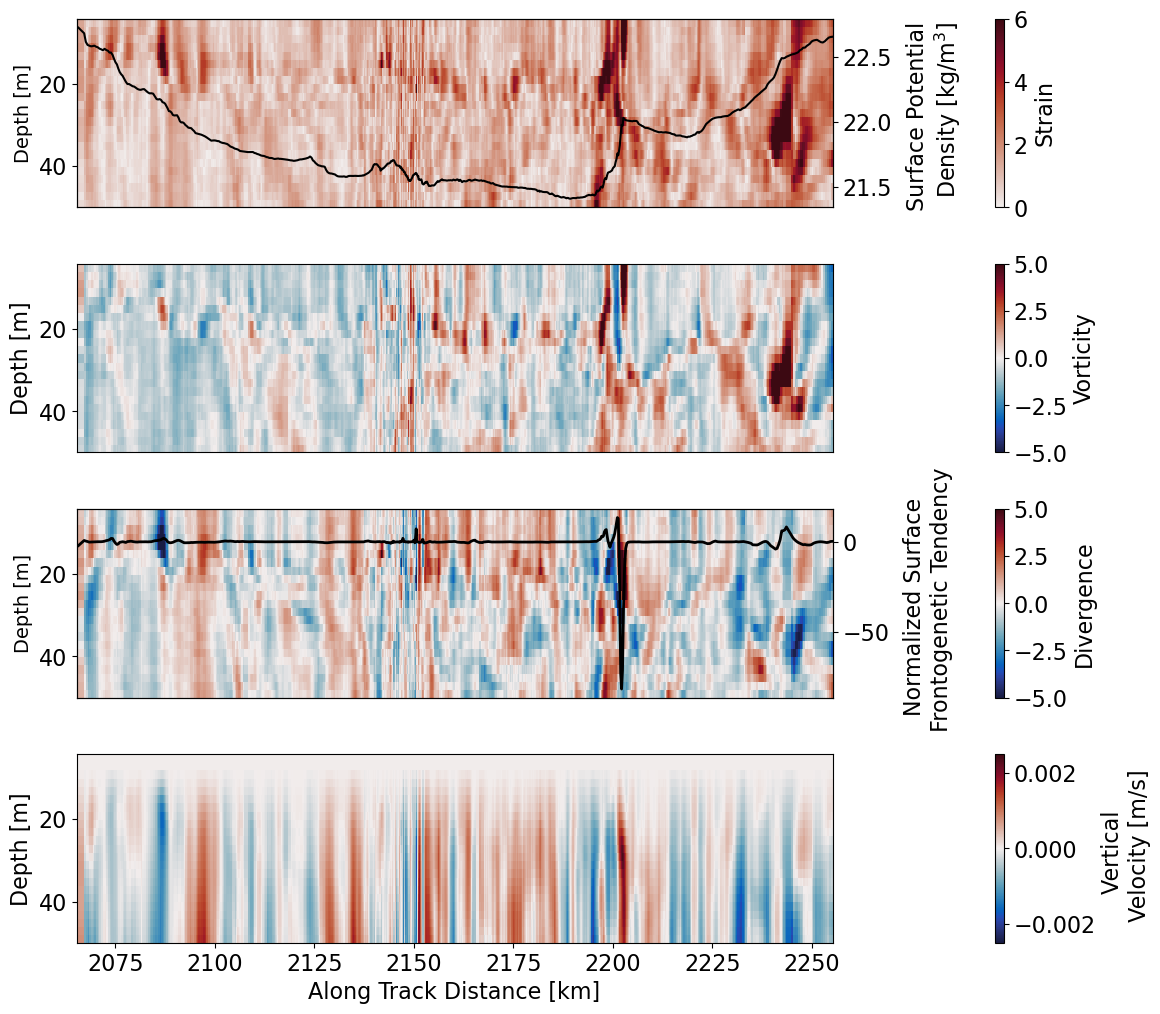

In [108]:
# plot of u and v velocity 

plt.rcParams.update({'font.size': 16})

# plume = subset.isel(time=slice(375,392))

labelpos = (0.01,0.05)
ylim = (50,4.24)

fig = plt.figure(figsize=(16,12))


ax = fig.add_subplot(411)

plt.subplots_adjust(hspace=0.3)

kw = {'cmap': cmocean.cm.amp,
      'vmin':0,
      'vmax':6
      }
im = plt.pcolormesh(plume.distance,
               plume.depth,
               plume.strain,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]',fontsize=14)
plt.xticks([])


plt.twinx()

plt.plot(plume.distance,
         plume.sel(saildrone='1060').sigma0,color='k')
plt.ylabel('Surface Potential \n Density [kg/m$^3$]',labelpad=10)

plt.colorbar(label='Strain',pad=0.15)


kw = {'cmap': cmocean.cm.balance,
      'vmin':-5,
      'vmax':5
      }
ax = fig.add_subplot(412)
plt.pcolormesh(plume.distance,
               plume.depth,
               plume.vort,**kw)
plt.ylim(*ylim)
plt.xticks([])
plt.ylabel('Depth [m]')
plt.xticks([])

plt.colorbar(label='Vorticity',pad=0.15)



ax = fig.add_subplot(413)
im = plt.pcolormesh(plume.distance,
                    plume.depth,
                    plume.div,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]',fontsize=14)
plt.xticks([])
fig.subplots_adjust(right=0.8)
plt.colorbar(label='Divergence',pad=0.15)

plt.twinx()

plt.plot(plume.distance,
         plume.F.isel(depth=0),color='k',linewidth=2)
plt.ylabel('Normalized Surface \n Frontogenetic Tendency',labelpad=10)

# Vertical V
ax = fig.add_subplot(414)

kw = {'cmap': cmocean.cm.balance,
      'vmin':-0.0025,
      'vmax':0.0025
      }

im = plt.pcolormesh(plume.distance,
               plume.depth,
               plume.w,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]')
plt.xlabel('Along Track Distance [km]')
# ax.text(*labelpos, 'Vertical Velocity', fontsize=13,transform=ax.transAxes)
plt.colorbar(label='Vertical \n Velocity [m/s]',pad=0.15)

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/front_casestudy_VortDivStrainW_paper.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

In [112]:
nonplume = nonplume.dropna(dim='time')

/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1801163799.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(nonplume.distance,
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1801163799.py:35: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(label='Strain',pad=0.15)
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_93833/1801163799.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.

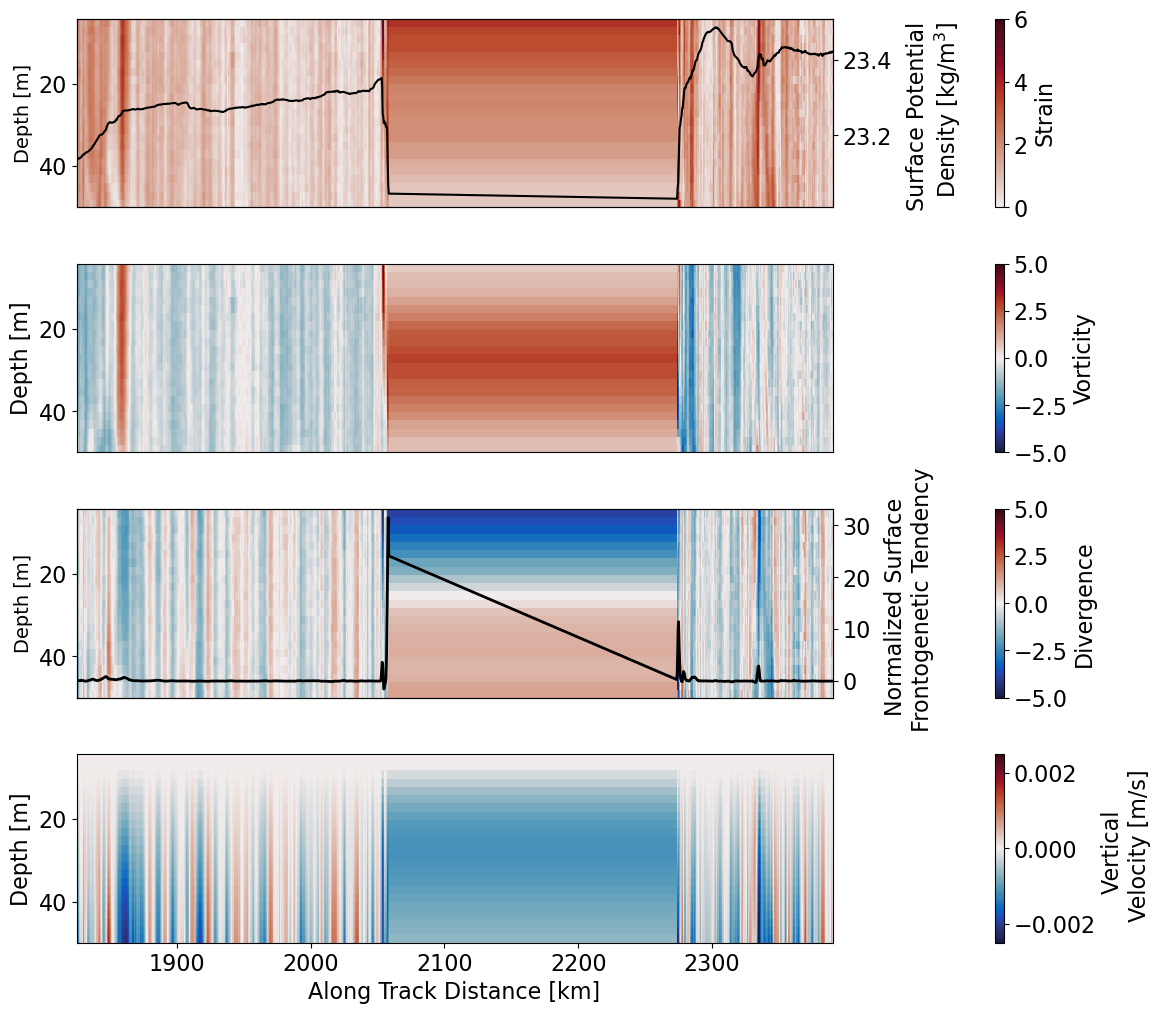

In [113]:
# plot of u and v velocity 

plt.rcParams.update({'font.size': 16})

#  = subset.isel(time=slice(375,392))

labelpos = (0.01,0.05)
ylim = (50,4.24)

fig = plt.figure(figsize=(16,12))


ax = fig.add_subplot(411)

plt.subplots_adjust(hspace=0.3)

kw = {'cmap': cmocean.cm.amp,
      'vmin':0,
      'vmax':6
      }
im = plt.pcolormesh(nonplume.distance,
               nonplume.depth,
               nonplume.strain,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]',fontsize=14)
plt.xticks([])


plt.twinx()

plt.plot(nonplume.distance,
         nonplume.sel(saildrone='1060').sigma0,color='k')
plt.ylabel('Surface Potential \n Density [kg/m$^3$]',labelpad=10)

plt.colorbar(label='Strain',pad=0.15)


kw = {'cmap': cmocean.cm.balance,
      'vmin':-5,
      'vmax':5
      }
ax = fig.add_subplot(412)
plt.pcolormesh(nonplume.distance,
               nonplume.depth,
               nonplume.vort,**kw)
plt.ylim(*ylim)
plt.xticks([])
plt.ylabel('Depth [m]')
plt.xticks([])

plt.colorbar(label='Vorticity',pad=0.15)



ax = fig.add_subplot(413)
im = plt.pcolormesh(nonplume.distance,
                    nonplume.depth,
                    nonplume.div,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]',fontsize=14)
plt.xticks([])
fig.subplots_adjust(right=0.8)
plt.colorbar(label='Divergence',pad=0.15)

plt.twinx()

plt.plot(nonplume.distance,
         nonplume.F.isel(depth=0),color='k',linewidth=2)
plt.ylabel('Normalized Surface \n Frontogenetic Tendency',labelpad=10)

# Vertical V
ax = fig.add_subplot(414)

kw = {'cmap': cmocean.cm.balance,
      'vmin':-0.0025,
      'vmax':0.0025
      }

im = plt.pcolormesh(nonplume.distance,
               nonplume.depth,
               nonplume.w,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]')
plt.xlabel('Along Track Distance [km]')
# ax.text(*labelpos, 'Vertical Velocity', fontsize=13,transform=ax.transAxes)
plt.colorbar(label='Vertical \n Velocity [m/s]',pad=0.15)

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/front_casestudy_VortDivStrainW_paper.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

In [115]:
import scipy 

In [119]:
plume

<xarray.Dataset>
Dimensions:            (saildrone: 3, time: 673, depth: 24)
Coordinates:
  * time               (time) datetime64[ns] 2020-02-16T15:55:00 ... 2020-02-...
  * depth              (depth) float64 4.2 6.2 8.2 10.2 ... 44.2 46.2 48.2 50.2
  * saildrone          (saildrone) float32 1.026e+03 1.06e+03 1.061e+03
    latitude           (saildrone, time) float64 ...
    longitude          (saildrone, time) float64 ...
Data variables: (12/45)
    u                  (saildrone, time, depth) float64 -0.101 -0.069 ... 0.015
    v                  (saildrone, time, depth) float64 0.155 0.142 ... 0.532
    e                  (saildrone, time, depth) float64 0.0 -0.006 ... -0.005
    relative_dist      (saildrone, time) float64 0.6873 1.054 ... 1.668 1.466
    UWND_MEAN          (saildrone, time) float64 -7.432 -7.872 ... -10.05 -8.83
    UWND_STDDEV        (saildrone, time) float64 0.578 0.598 ... 0.894 0.956
    ...                 ...
    ey                 (depth, time) float64 1.271e-06 3.664e-06 ... 1.114e-06
    vort               (depth, time) float64 1.586 0.7675 ... -1.527 -1.854
    div                (depth, time) float64 1.198 0.6541 ... 1.766 1.718
    strain             (depth, time) float64 2.532 1.49 0.9553 ... 0.6858 0.3768
    w                  (depth, time) float64 -0.0 -0.0 ... -0.0005348 -0.0007428
    F                  (depth, time) float64 -2.757 -2.235 ... -0.3784 -0.311
Attributes: (12/38)
    description:                     Saildrone NetCDF Format
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    keywords:                        ADCP,Saildrone
    geospatial_vertical_units:       meters
    geospatial_lon_units:            degrees_east
    geospatial_lat_units:            degrees_north
    ...                              ...
    geospatial_lat_max:              8.055058442987502
    geospatial_lon_min:              -49.564746832475066
    geospatial_lon_max:              -49.55606075003743
    geospatial_vertical_positive:    down
    wmo_id:                          4803908
    license:                         2020 (C) SAILDRONE Inc.  All Rights Rese...

In [120]:
nonplume

<xarray.Dataset>
Dimensions:            (saildrone: 3, time: 685, depth: 24)
Coordinates:
  * time               (time) datetime64[ns] 2020-02-15T06:30:00 ... 2020-02-...
  * depth              (depth) float64 4.2 6.2 8.2 10.2 ... 44.2 46.2 48.2 50.2
  * saildrone          (saildrone) float32 1.026e+03 1.06e+03 1.061e+03
    latitude           (saildrone, time) float64 ...
    longitude          (saildrone, time) float64 ...
Data variables: (12/45)
    u                  (saildrone, time, depth) float64 0.101 0.112 ... -0.013
    v                  (saildrone, time, depth) float64 -0.211 -0.209 ... 0.374
    e                  (saildrone, time, depth) float64 -0.003 0.011 ... 0.001
    relative_dist      (saildrone, time) float64 0.9304 0.8427 ... 2.091 1.849
    UWND_MEAN          (saildrone, time) float64 -9.188 -8.27 ... -9.22 -8.73
    UWND_STDDEV        (saildrone, time) float64 0.83 0.82 0.812 ... 0.93 0.814
    ...                 ...
    ey                 (depth, time) float64 1.614e-06 1.285e-06 ... 1.22e-06
    vort               (depth, time) float64 -1.37 -1.254 ... -0.4016 -0.005489
    div                (depth, time) float64 -1.432 -1.247 ... 0.06281 0.2853
    strain             (depth, time) float64 1.609 1.668 1.784 ... 0.5908 0.3874
    w                  (depth, time) float64 -0.0 -0.0 ... 0.0002508 0.0002566
    F                  (depth, time) float64 0.1986 0.1908 ... -0.002203
Attributes: (12/38)
    description:                     Saildrone NetCDF Format
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    keywords:                        ADCP,Saildrone
    geospatial_vertical_units:       meters
    geospatial_lon_units:            degrees_east
    geospatial_lat_units:            degrees_north
    ...                              ...
    geospatial_lat_max:              8.055058442987502
    geospatial_lon_min:              -49.564746832475066
    geospatial_lon_max:              -49.55606075003743
    geospatial_vertical_positive:    down
    wmo_id:                          4803908
    license:                         2020 (C) SAILDRONE Inc.  All Rights Rese...

In [129]:
scipy.stats.ttest_ind(a=plume.div.values.flatten(),b=nonplume.div.values.flatten())

TtestResult(statistic=26.024922888175894, pvalue=8.408085559690014e-148, df=32590.0)

In [117]:
scipy.stats.ttest_ind?

Signature:
scipy.stats.ttest_ind(
    a,
    b,
    axis=0,
    equal_var=True,
    nan_policy='propagate',
    permutations=None,
    random_state=None,
    alternative='two-sided',
    trim=0,
    *,
    keepdims=False,
)
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
equal_var : bool, optional
    If True (defaul